# Your Real Odds of Dying From COVID-19 in the U.S.

A series of simple **charts** that attempt to put your risk of dying from COVID-19 in context, no matter what your age.

You may be surprised.

:::{tip}
Feeling impatient? [Jump straight to the charts. 📊📈📉](charts)
:::

*Last updated: 2022 Sep 21*

## Introduction

In mid-2021, the vaccines for COVID-19 were still relatively new, and many of my friends were much more worried about the risk from the vaccines than the risk from COVID. 

As people in their 30s and 40s (and even 50s and 60s), they insisted that COVID was mainly a threat to "old people", while an "unknown" vaccine might be far more dangerous to their own young bodies, not to mention their innocent children.

They said over and over again that COVID was basically the flu, that the whole "pandemic" was a wild exaggeration, that the only people dying were the old and sick who'd have died soon anyway.

These are rather extravagant claims. Shouldn't they be fairly easy to check? 

## Research Questions

We have the statistics for COVID-19 deaths in the United States. We can pose simple questions, asking **how COVID-19 deaths compare** to:

* **Flu deaths** in recent years

* Other **mass casualties** in U.S. history

* Other **causes of death**, broken down by **age bracket**

These are simple questions, with simple answers. Answers that can be best expressed in basic **bar charts**.

## Motivation

Yet, to my surprise, when I searched in mid-2021, I could not find this information presented anywhere, at least not all in one place. 

This is a problem. We can only make sense of numbers, especially large numbers, by **comparison**. 

People like my friends seemed to assess their COVID-19 risk by a single anchor: the extreme death toll for the extreme elderly. That was the biggest number in their minds, and to "calculate" their own risk, they counted down from there.

But these same friends would put a great deal of effort into avoiding products that might cause cancer, or unhealthy diets that might lead to heart attacks. Why? Isn't it true that these risks would be much *worse* when they reached their 80s? Why worry about them now?

Clearly, many adults see heart disease and cancer in a very different context. The risk of dying *at all* at their age gets their attention. 

In the charts that follow, I compare COVID-19 deaths in the U.S. to these and other causes of death. When you put COVID-19 deaths in this context, the risk feels quite different than when your operating assumption is, "I'm younger than 80, so I'll probably be fine."

## Will These Charts Actually Change Anyone's Mind?

That said, let's be honest: I don't expect to change anyone's mind with a simple series of charts. 

For the vaccine skeptic, this data is untrustworthy at every level. 

Are all these reported "COVID deaths" *really* due to COVID-19? 

Even if they are, how can we be sure that a "new" vaccine technology will not lead to far more dire consequences, up to and including the end of civilization? These meta questions are larger than any "untrusted" datasets can answer.

## Adapted From a Larger Project: "The Vaccine Show!"

So my original project was much more ambitious: an interactive "game" (using [Twine/Twee](https://twinery.org/) and [SugarCube](http://www.motoslave.net/sugarcube/2/docs/)) about a made-up game show called, yes, [*The Vaccine Show!*]

```{figure} assets/Vaccine_Show_Logo.png
---
align: center
width: 400px
---

[*The Vaccine Show!*](https://vaccineshow.billalive.com)
```

[*The Vaccine Show!*]: https://vaccineshow.billalive.com

With so many possible objections to the vaccine, an article or book seemed too linear. By contrast, this interactive format lets the **reader explore their own objections**.

```{image} assets/vaccine-show-questions-format.png
:width: 700px
:alt: Vaccine Show - Example of format
:align: center
```

With each choice, the reader can encounter more evidence tailored to their own concerns. 

For instance, if you click the question of whether COVID was *really* an emergency, you soon come to this:

```{image} assets/vaccine-show-estimated-flu-deaths-to-2019.png
:width: 700px
:alt: Vaccine Show - Estimated Flu Deaths (to 2019)
:align: center
```

It's a pretty neat format.

:::{seealso}

For the full (though unfinished) game experience, see [*The Vaccine Show!*]
:::

But one downside is that all this information is buried in the labrynthine choice paths of the game.

In this notebook, we'll extract the key charts for easier consumption. 

:::{important}

Even if you fully accept mainstream science and have no qualms about vaccines, this data may still startle you.

Consider this: in the first year of the pandemic, was COVID-19 was in the **top ten leading causes of death** for Americans in their **thirties**? How about the **top five**?

Read on to find out.
:::

:::{note}

Although these charts are as accurate and useful as I could make them, see below for
[important caveats](caveats).

:::

## Setup

```{image} ../assets/r-logo.png
:width: 100px
:alt: R Logo
:align: right
```

In [1]:
library(ggplot2)
library(scales)
library(dplyr, warn.conflicts = FALSE)
library(readr, warn.conflicts = FALSE)
library(stringr)
library(gt)
library(gtExtras)
library(svglite)
# library(RColorBrewer)

# Updated cumulative COVID deaths
covid_deaths_updated <- "1,048,935"
covid_deaths_updated_num <- 1048935
date_updated <- "through 2022 Sep"


# REPORT DATA
# Death count for Demographic Charts

# COVID Deaths in the U.S. for First 12 months of the pandemic, through 2021 Feb.
covid_deaths_first_year <- "527,587"
covid_deaths_first_year_num <- 527587
date_first_year_covid <- "First Year, through 2021 Feb"

# CONFIGURATION

# Make plots wider 
options(repr.plot.width=15, repr.plot.height=10)
color_bar <- "red"
color_bar_gradient2 <- "orange"
color_bar_nomatch <- "gray"
color_covid_row <- "pink"
# covid_match_str <- "⮞⮞ COVID-19 ⮜⮜"
covid_match_str <- "COVID-19"

### Helper Functions

In [2]:
theme_vaccine <- function() {
  theme_gray(
    base_size = 20,
  ) %+replace%
  theme(
    plot.title = element_text(
      size = 24,
      margin = margin(10,0,10,0),
      hjust = 0.5,
      face = "bold"),
    plot.subtitle = element_text(
      margin = margin(00,0,10,0),
      lineheight = 34,
      hjust = 0.5
    ),
    plot.caption = element_text(
      size = 14,
      hjust = 0.5,
      margin = margin(10,0,5,0),
      color = "#777777"),
    axis.text.x=element_text(
      angle=45,
      hjust = 1,
      vjust = 1,
      margin = margin(t=5, b=25)
    ),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
    legend.key.size = unit(1, "cm")
  )
}


hide_grid_x <- function() {
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
  )
}


hide_grid_y <- function() {
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor.y = element_blank(),
  )
}


bar_format <- function(
                       gradient = TRUE,
                       gradient_low = "yellow",
                       gradient_high = "red",
                        coord_flip = TRUE,
                       scale_y_continuous = TRUE,
                       stat = "identity",
                        hide_axis_x = FALSE,
                        hide_legend = FALSE
                       ) {
  list(
    geom_bar(stat=stat),
    # theme_vaccine must precede later theme() items.
    theme_vaccine(),
    if (gradient) {
        scale_fill_gradient(
            labels = comma,
            low = gradient_low,
            high = gradient_high
        )
    },
    if (coord_flip) {
        coord_flip()
    },
    # coord_flip also determines hide_grid_x, hide_grid_y
    if (coord_flip) { 
        hide_grid_y()
    } else {
        hide_grid_x()
    },
    if (scale_y_continuous) {
        scale_y_continuous(labels = comma)
    },
    if (hide_axis_x) {
        theme(
            axis.ticks.x=element_blank(),
            axis.text.x=element_blank()
            )
    },
    if (hide_legend) {
        theme(legend.position = "none")
    }
  )
}


show_date_updated <- function(use_date_updated=FALSE) {
    if (use_date_updated) {
        use_date = date_updated
    } else {
        use_date = date_first_year_covid
    }
    paste("(", use_date, ")", sep="")
}


caption_default <- function(
    source,
    plural=FALSE
    ) {
    if (plural) {
        caption_prepend="Sources:"
    } else {
        caption_prepend="Source:"
    }
    caption_append="(vaccineshow.billalive.com)"
    paste(caption_prepend, source, caption_append)
}


prep_table <- function(data, 
                       title,
                       col_arrange='',
                       subtitle='',
                       col_number='') {
    data %>% 
    gt() %>%
    gt_theme_538() %>%
    opt_row_striping() %>%
    { 
        if (subtitle != '') {
          tab_header(., title = title, subtitle = subtitle)
        } else { 
          tab_header(., title = title)
        }
    } %>%
    { 
        if (col_number != '') {
          fmt_number(., columns = all_of(col_number), decimals = 0)
        } else { . }
    } 
}


get_covid_row <- function(data, col, 
                          arg_covid_match_str=covid_match_str) {
    which(str_detect(data[[col]], arg_covid_match_str))
}


get_covid_bar_color <- function(table, col, 
                        arg_covid_match_str=covid_match_str,
                        arg_color_bar=color_bar,
                        arg_color_bar_nomatch=color_bar_nomatch) {
    ifelse(
        str_detect(gt_index(table, col), arg_covid_match_str), 
        color_bar, color_bar_nomatch
    )
}

show_table <- function(table) {
    gt:::as.tags.gt_tbl(table)
}


title_ages_vs_leading_cause <- function(ages) {
    paste("Ages ", ages, ": Causes of Death",
         sep="")
    }


show_table_covid_vs_other <- function(data, col_label) {
    # Note that gt_plt_bar() requires column name to NOT
    # be surrounded by quotes.
    show_table(prep_table(data, title, 
                      subtitle=subtitle, col_number="Deaths") %>%
    gt_highlight_rows(rows = get_covid_row(data, col_label), 
                      fill = color_covid_row) %>%
    gt_plt_bar(column = Deaths, 
               keep_column = TRUE, 
               color = get_covid_bar_color(., col_label)))
    }

## Cumulative Deaths vs. First Year of Deaths

:::{important}

Each chart in this report focuses on **one of two different COVID-19 death totals**. It's important to understand which total you're looking at in each chart.
:::

These two totals are:

* The **cumulative death toll from COVID-19** as of my most recent update (**2022 September**).

* The deaths from only the **first year** of COVID-19, through **2021 February**.

When comparing COVID-19 to mass casualty *events* (such as the Civil War or 9/11), I have used the **cumulative total** for **all** COVID-19 deaths in the U.S thus far. 

But ongoing causes of death, like the flu or cancer, are normally analyzed by year. So, for charts that compare COVID-19 deaths to *ongoing* causes of death, I've used the deaths from only the first year of the pandemic in the U.S., through 2021 February.

This might seem too simplistic, but there are other reasons for this choice, which I explain [below](first-year-covid). In particular, **vaccines weren't yet widely available**. My primary goal is to persuade people to get the vaccines, so this first year of data shows what the death rates looked like when *no one* could get vaccinated.

Although the comparison isn't perfect, by comparing the first year of COVID-19 deaths to our most recent "ordinary" year of deaths (2019), we can get a much better context for understanding the risks of dying from COVID-19 at younger ages.

## All Death Totals in this Report are for the U.S. Only

:::{note}
All death totals in this report, from *any* cause, are from the United States. For why, see [below](focus-united-states).
:::

## If You're Vaccinated, These Aren't Your Odds

:::{important}
This report focuses on the first year of the pandemic, before vaccines were available. If you've kept up with your vaccines, your risks are now [much, much lower](vaccines-change-odds).
:::

(charts)=
## COVID-19 vs. the Flu

Let's start with the flu.

In the early days, COVID-19 was often compared to the flu.

I myself was surprised to discover that in a bad year, the flu might kill **50,000** or even **60,000** people in the U.S.

The flu? Really?

### Flu Deaths by Year

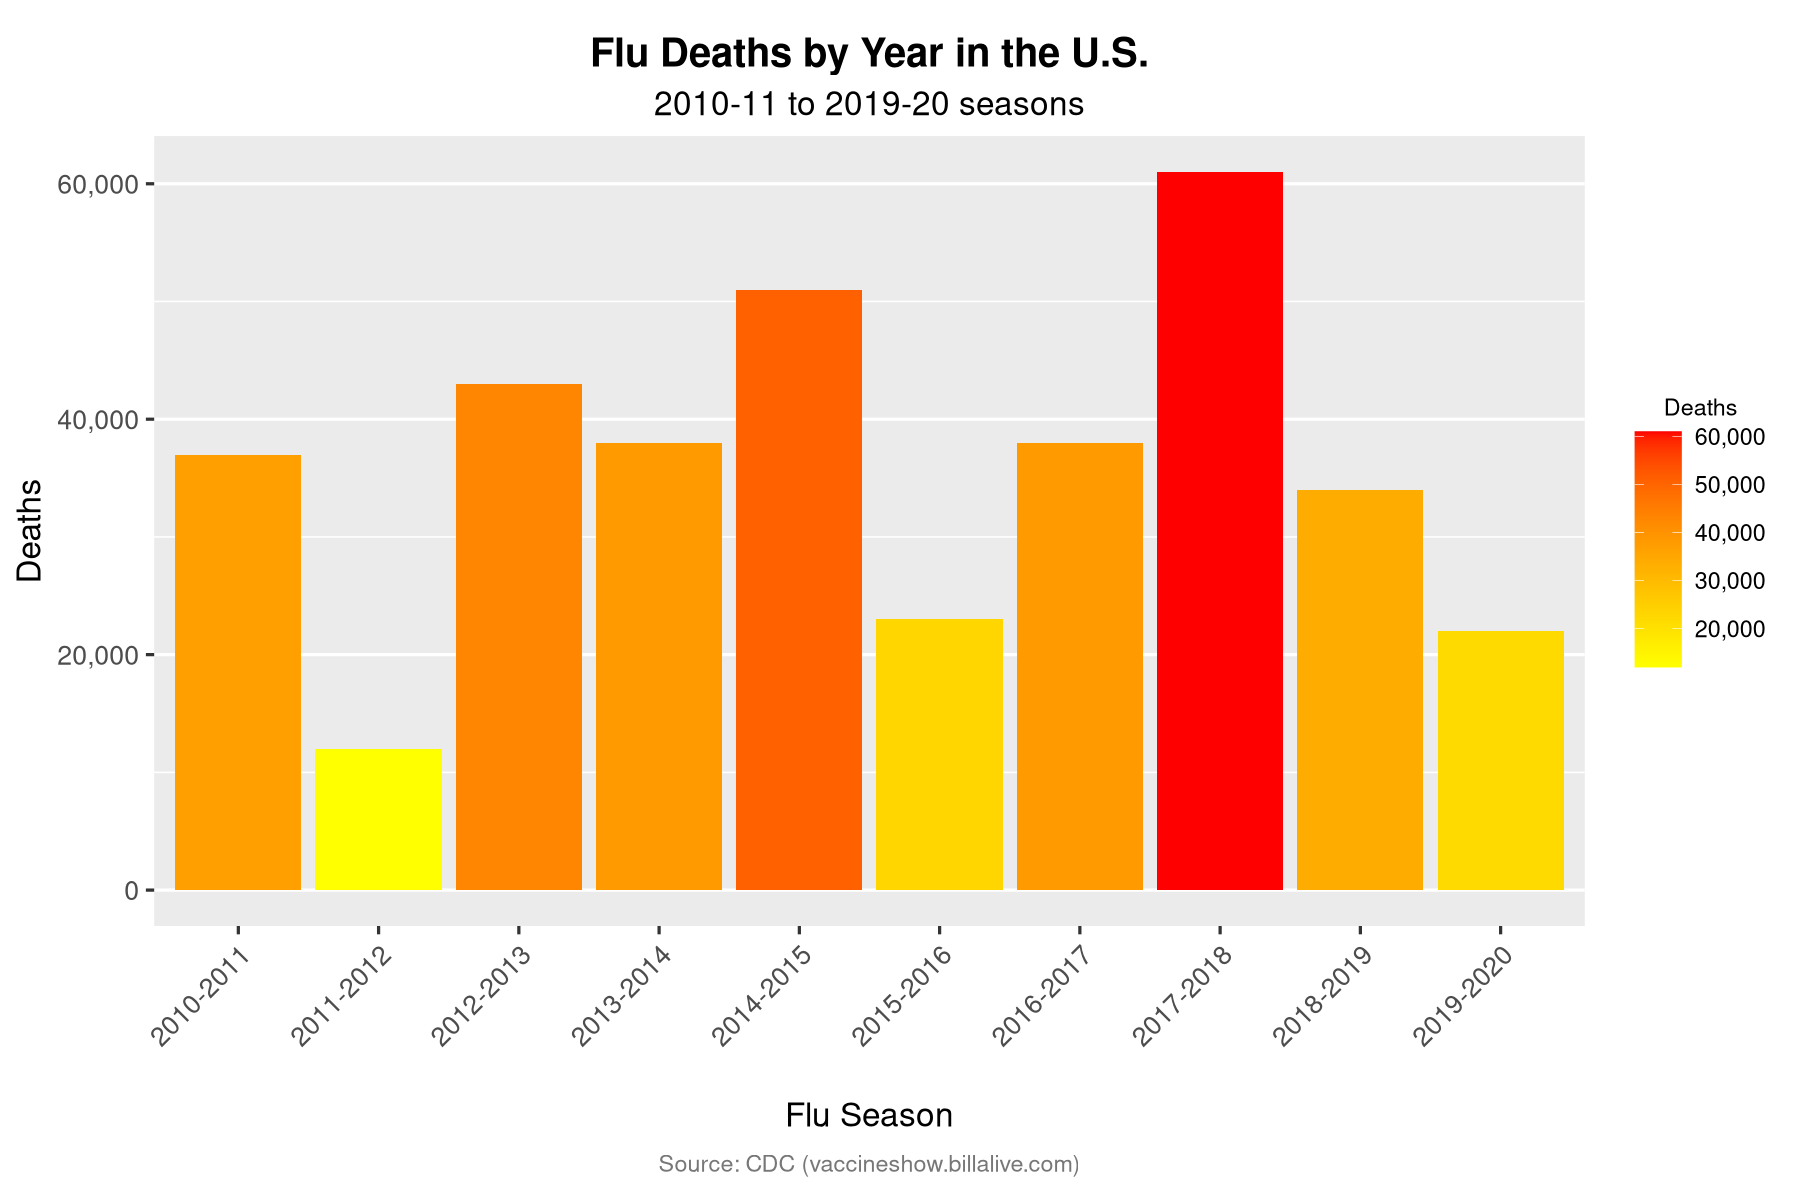

In [3]:
title = "Flu Deaths by Year in the U.S."
subtitle = "2010-11 to 2019-20 seasons"

data <- read_csv("data/flu-deaths-us.csv", show_col_types = FALSE)
ggplot(data, aes(x=FluSeason, y=Deaths, fill=Deaths)) + geom_bar(stat="identity") +
  labs(
    title = title,
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Flu Season",
    y="Deaths"
  ) +
bar_format(coord_flip=FALSE)

Those flu deaths look pretty bad. They *are* pretty bad. 


### Flu Deaths vs. COVID Deaths (First Year)

But now compare them to the *first 12 months* of COVID-19 deaths.

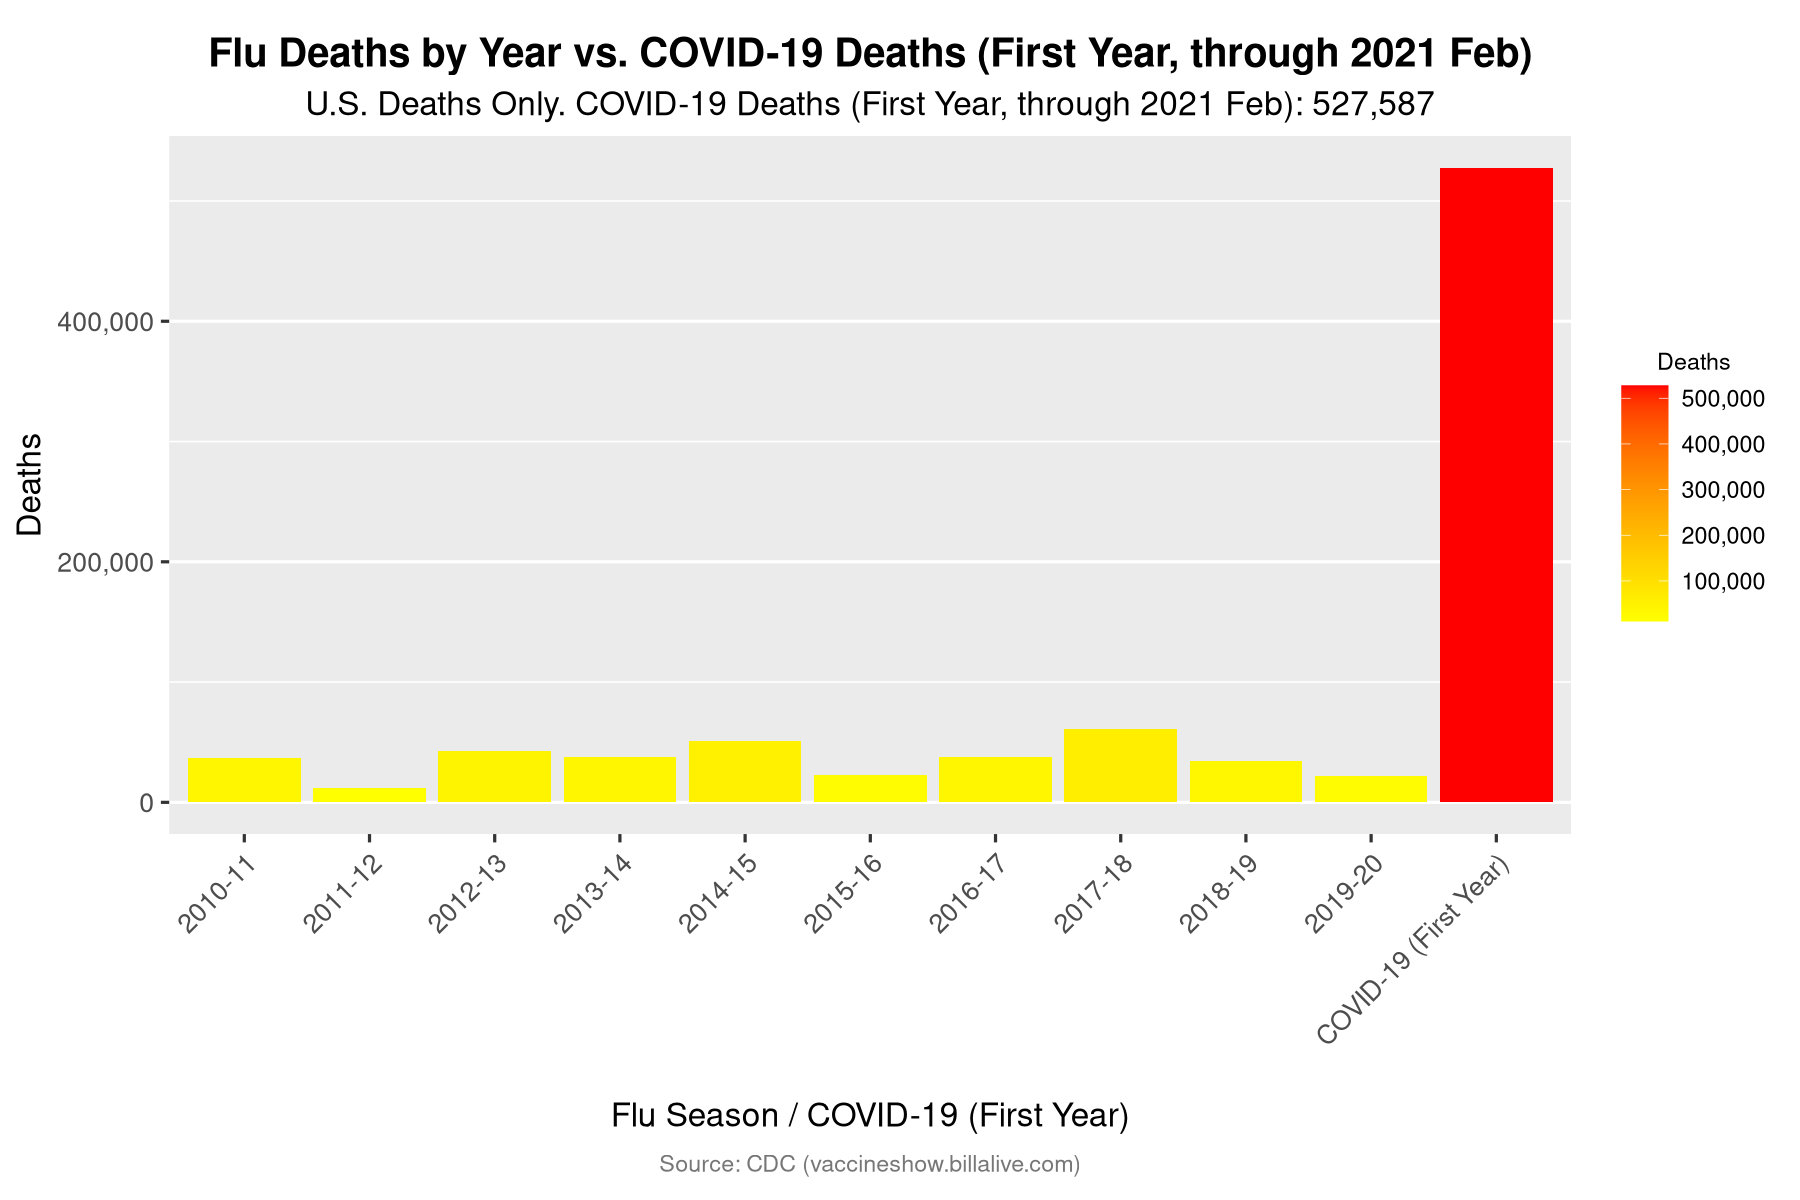

In [4]:
data <- read_csv("data/flu-deaths-vs-covid-usa.csv", show_col_types = FALSE)
title = paste("Flu Deaths by Year vs. COVID-19 Deaths",
              show_date_updated())
subtitle = paste("U.S. Deaths Only. COVID-19 Deaths ", show_date_updated(), ": ", covid_deaths_first_year, sep="")

ggplot(data, aes(x=FluSeason, y=Deaths, fill=Deaths)) +
  labs(
    title = title,
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Flu Season / COVID-19 (First Year)",
    y="Deaths"
  ) +
  bar_format(coord_flip=FALSE)

Here are the numbers:

In [5]:
show_table(prep_table(data, title, 
                      col_number="Deaths") %>%
    gt_plt_bar(
        column = Deaths,
        keep_column = TRUE,
        color = get_covid_bar_color(., "FluSeason")
    ) %>%
    cols_label(FluSeason = html("Flu Season")))

Shiny tags cannot be represented in plain text (need html)

This is what I mean by a simple chart.

For me, that skyscraper of death dwarfs all argument. No, COVID-19 is not "like the flu."

#### Sources

- [Flu deaths](https://www.cdc.gov/flu/about/burden/past-seasons.html)
- [COVID-19 deaths](https://covid.cdc.gov/covid-data-tracker/#datatracker-home)


## COVID-19 U.S. Deaths vs. Other U.S. Mass Casualties

That was the death toll after the first year of COVID-19. But what about the cumulative death toll?

By now, we all know that after less than two and a half years, COVID-19 has killed **over a million Americans**.

How does this compare to past national tragedies in U.S. history?

For the sheer death toll, nothing comes close.

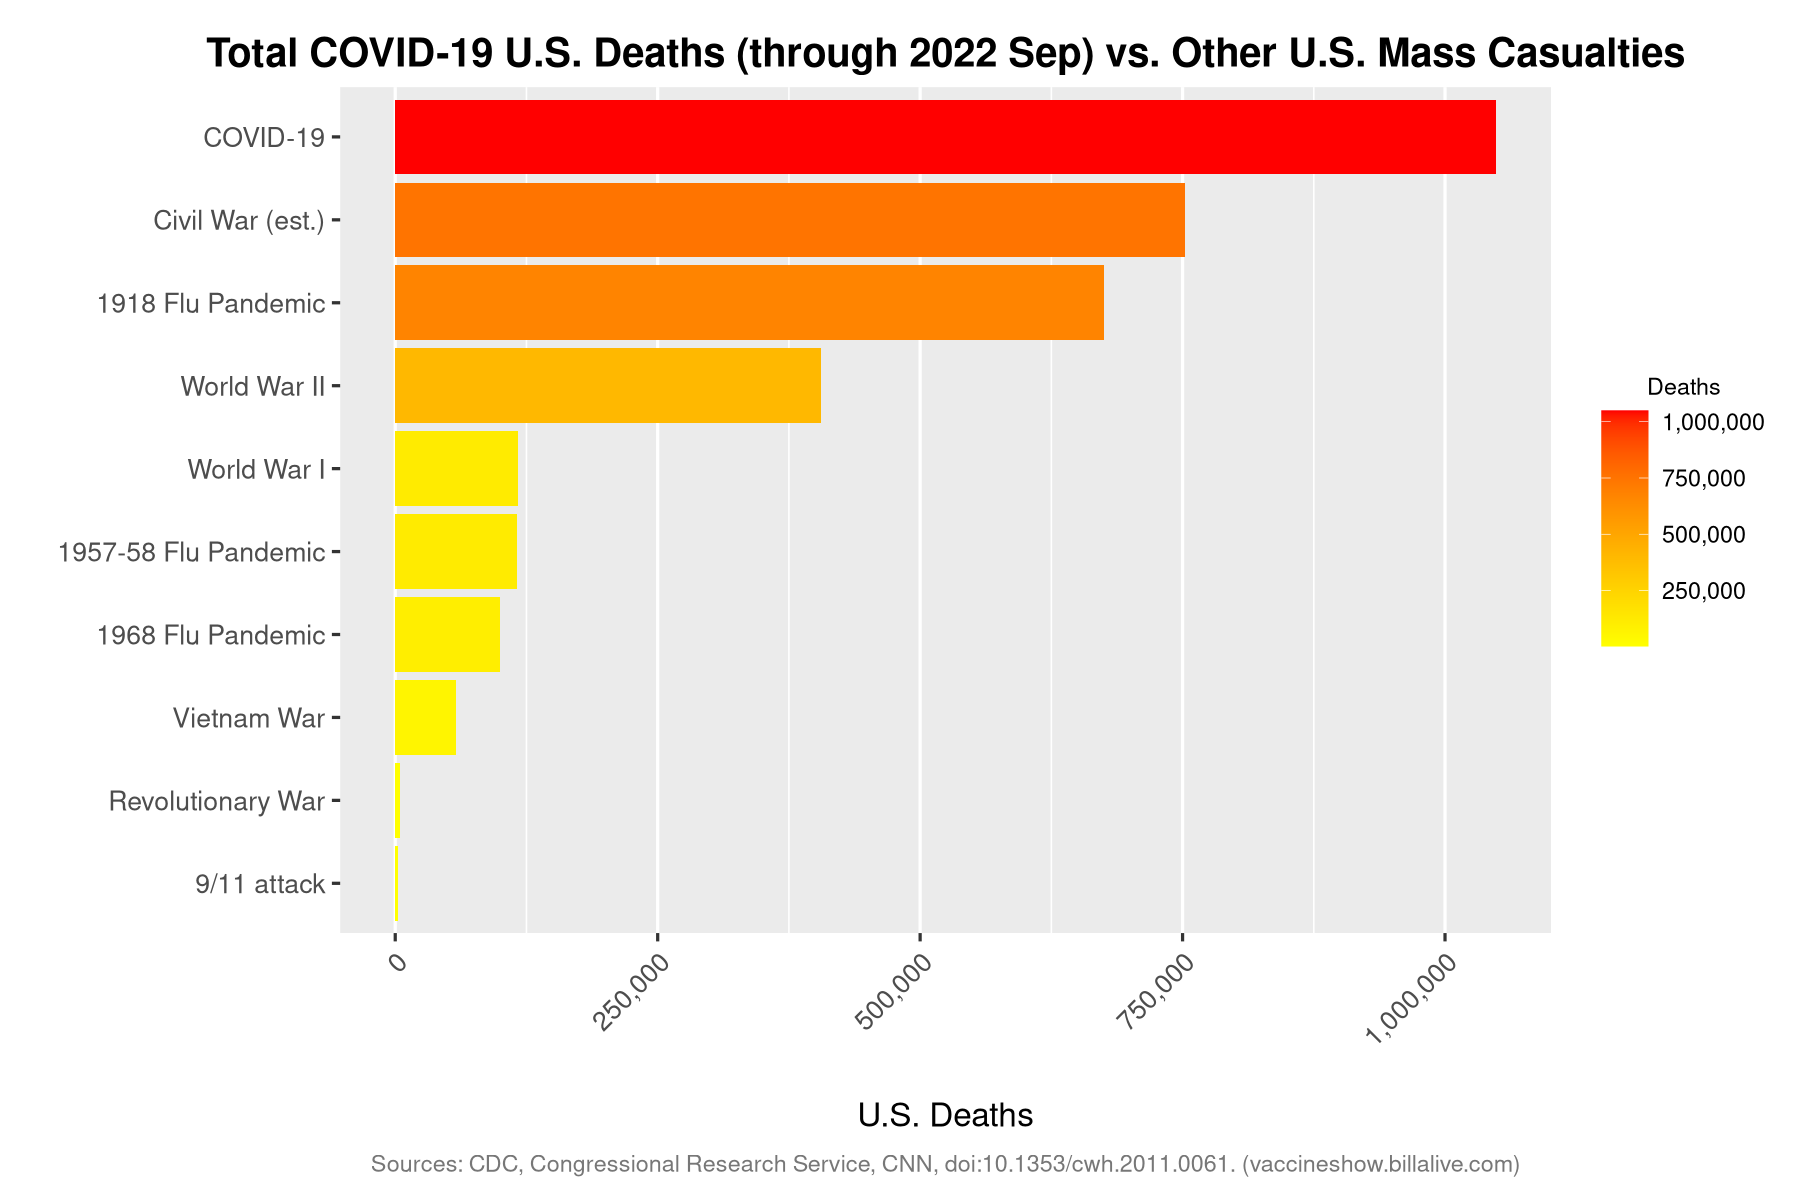

In [6]:
data <- read_csv("data/covid-vs-other-disasters-usa.csv", 
                 show_col_types = FALSE)
title = paste("Total COVID-19 U.S. Deaths", 
              show_date_updated(use_date_updated=TRUE),
              "vs. Other U.S. Mass Casualties")
subtitle = "(Wars show U.S. military deaths, including from war-related disease)"
ggplot(data, aes(x=reorder(Event, Deaths), y=Deaths, fill=Deaths)) +
  labs(
    title = title,
    # subtitle = show_date_updated(),
    caption = caption_default("CDC, Congressional Research Service, CNN, doi:10.1353/cwh.2011.0061.", plural=TRUE),
    x="",
    y="U.S. Deaths"
  ) +
  bar_format()

In [7]:
show_table_covid_vs_other(data, "Event")

Shiny tags cannot be represented in plain text (need html)

### Sources

- [COVID-19 deaths](https://covid.cdc.gov/covid-data-tracker/#datatracker-home)
- [9/11 deaths](https://www.cnn.com/2013/07/27/us/september-11-anniversary-fast-facts/)
- [1968 flu pandemic (100,000 U.S. deaths)](https://www.cdc.gov/flu/pandemic-resources/1968-pandemic.html)
- [1957-57 H2N2 flu pandemic (116,000 U.S. deaths)](https://www.cdc.gov/flu/pandemic-resources/1957-1958-pandemic.html)
- [1918 pandemic](https://www.cdc.gov/flu/pandemic-resources/1918-pandemic-h1n1.html)
- Military deaths: [Congressional Research Service](https://fas.org/sgp/crs/natsec/RL32492.pdf), Updated July 29, 2020 
- Civil War estimate of 752,000 deaths:
  - ["A Census-Based Count of the Civil War Dead "](https://muse.jhu.edu/article/465917), *Civil War History*, Kent State University Press
  - [Wikipedia](https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#cite_ref-Gugliotta_86-0)
  - Another historian argues that this number [does not include deaths of enslaved people](https://blog.oup.com/2012/04/black-white-demographic-death-toll-civil-war/).

## Total U.S. Deaths, All Causes

The most plausible objection to these horrifying statistics is that  many or most of these deaths weren't *really* due to COVID-19. Maybe everyone who was sick and going to die anyway *also* happened to catch COVID-19 on the way out, thus inflating the tally.

As a hypothesis, this presumes a massive medical incompetence on a scale hitherto unseen in modern times. But it is technically possible... until you consider that the *total* death count, from *all* causes, rose just as we'd have expected in 2020.

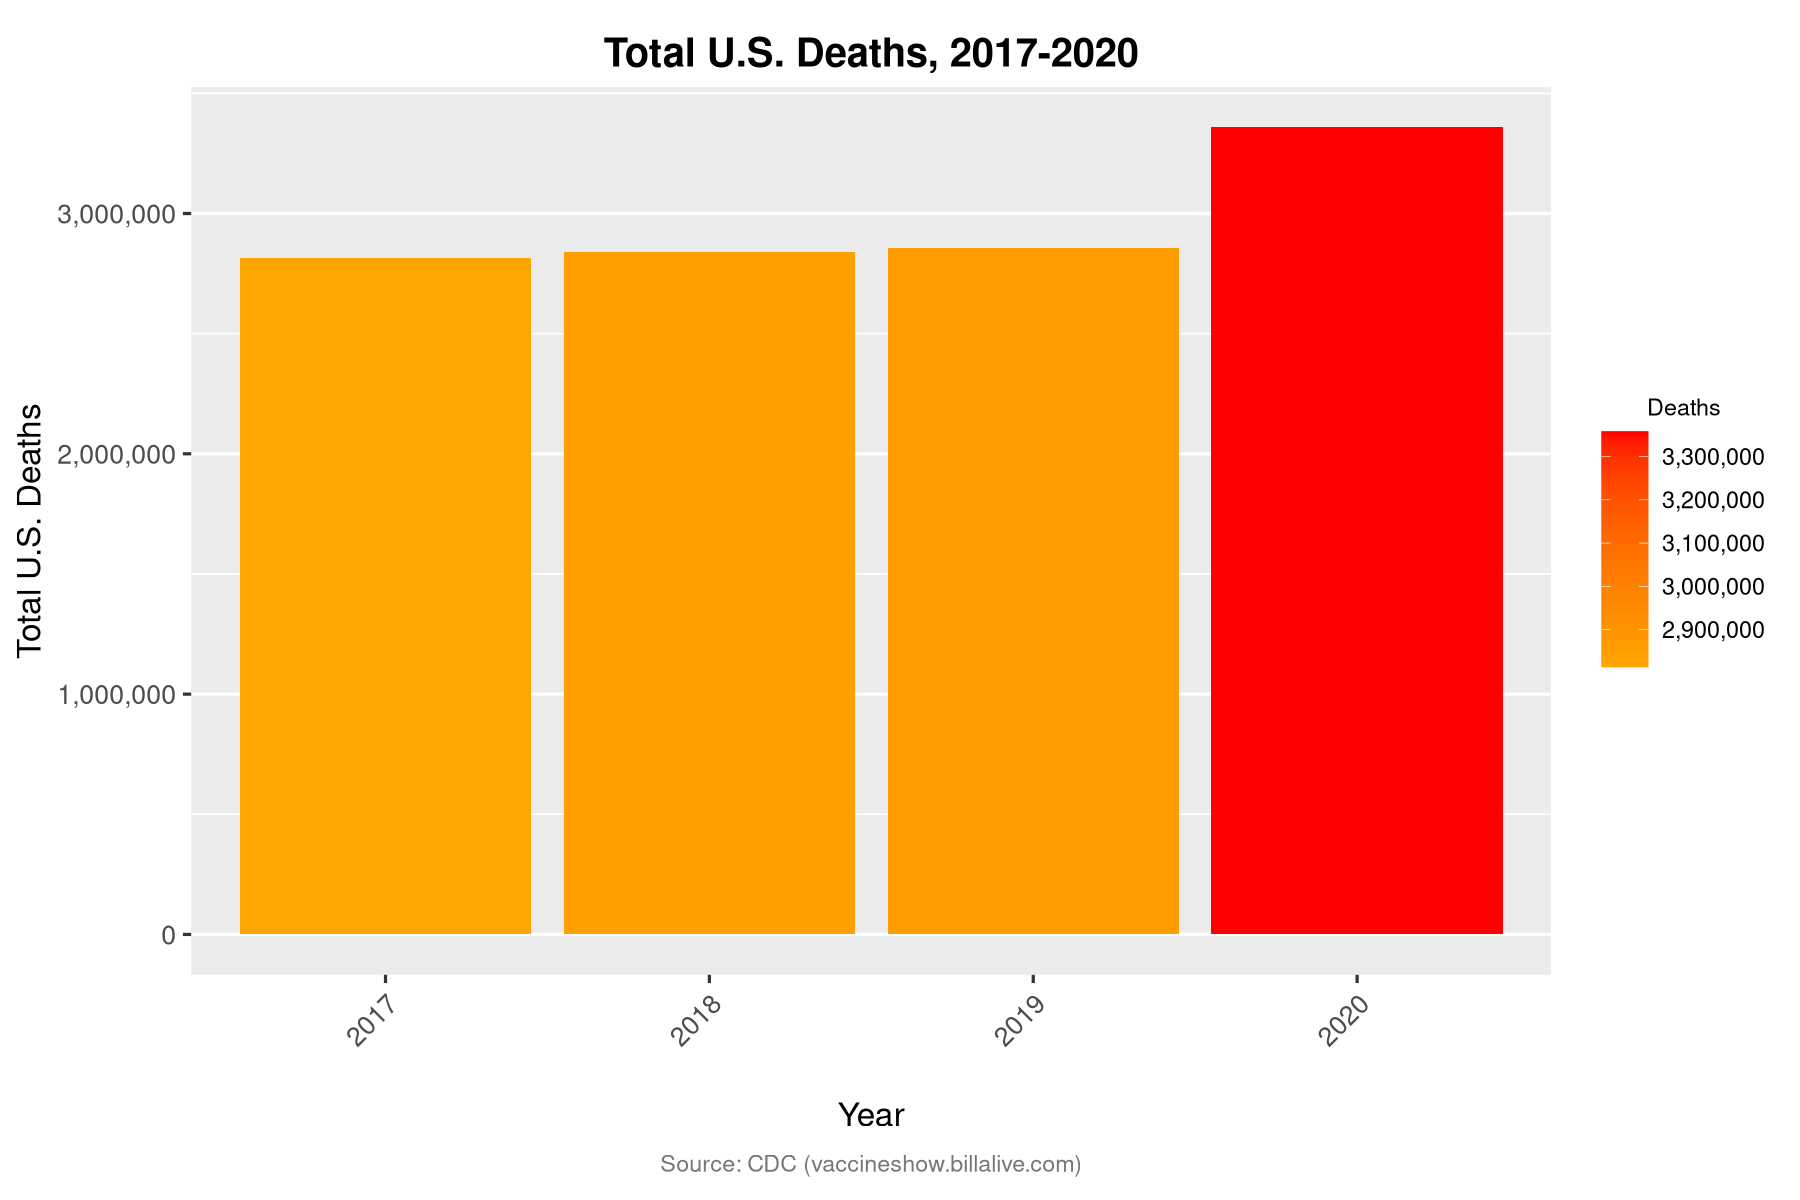

In [8]:
data <- read_csv("data/total-usa-deaths.csv", show_col_types = FALSE)
title = "Total U.S. Deaths, 2017-2020"

ggplot(data, aes(x=reorder(Year, Deaths), y=Deaths, fill=Deaths)) +
  labs(
    title = title,
    caption = caption_default("CDC"),
    x="Year",
    y="Total U.S. Deaths"
  ) +
  bar_format(gradient_low=color_bar_gradient2, coord_flip=FALSE)

In [9]:
show_table(prep_table(data, title, col_number="Deaths") %>%
    gt_plt_bar(
        column = Deaths,
        keep_column = TRUE,
        color = ifelse(
                    str_detect(gt_index(., "Year"), "2020"), 
                    color_bar, color_bar_gradient2)
    ))

Shiny tags cannot be represented in plain text (need html)

:::{important}
In 2020, **502,976 more Americans died overall** than in 2019.
:::

It's one thing to imagine hundreds of thousands of deaths being misdiagnosed. But is it really conceivable that in 21st century America, **half a million extra deaths** could be **faked?**

Note that this total does not even include all 12 months of the first year of the pandemic, which means it excludes the devastating first two months of 2021.

### Sources

* CDC, Death Statistics for 
[2017](https://www.cdc.gov/nchs/products/databriefs/db328.htm),
[2018](https://www.cdc.gov/nchs/products/databriefs/db355.htm),
[2019](https://www.cdc.gov/nchs/data/nvsr/nvsr70/nvsr70-08-508.pdf),
[2020](https://www.cdc.gov/mmwr/volumes/70/wr/mm7014e1.htm).

### COVID-19 Deaths vs. Other Deaths in 2020

This chart from the CDC separates the "ordinary" deaths in 2020 from the COVID-19 deaths.

```{figure} assets/cdc-total-deaths-showing-covid-2020.gif
---
width: 700px
align: center
name: mortality-data-2020
---
CDC, [Provisional Mortality Data — United States, 2020](https://www.cdc.gov/mmwr/volumes/70/wr/mm7014e1.htm)
```

## Do Only Old People Die of COVID-19?

Given this high death toll, is it really true that the overwhelming majority of the casualties have been the most elderly?

Even if it were, the question has always struck me as awkward at best.

```{figure} assets/vaccine-show-doesnt-covid-kill-old-people.png
---
width: 700px
name: vaccine-show-covid-mostly-old-people
align: center
---
Source: [The Vaccine Show!](https://vaccineshow.billalive.com)
```

But this whole way of framing the question might be a mistake.

### COVID-19 Deaths in the U.S.: All Ages

All during the pandemic, one chart we *have* seen is something like this:

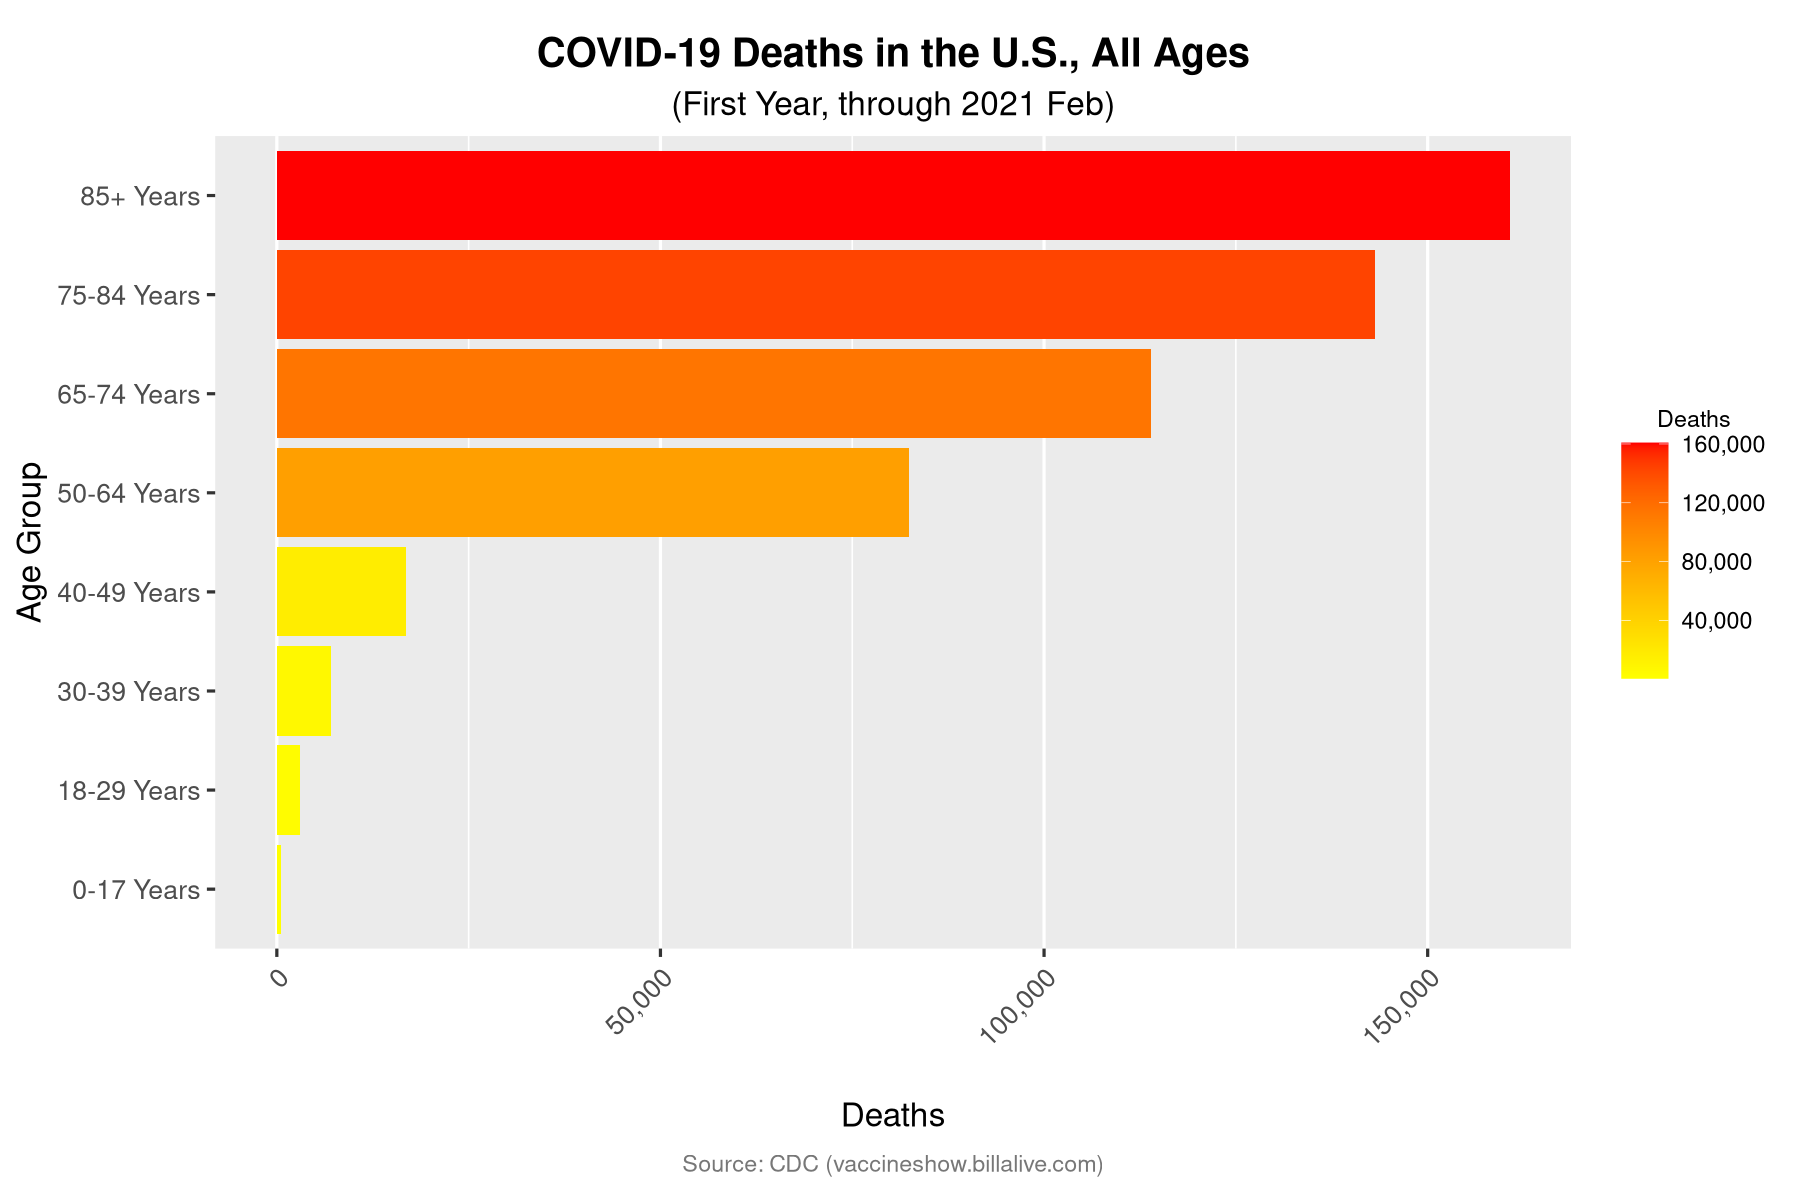

In [11]:
deaths_by_age = read_csv("data/deaths_by_age_group.csv",
                show_col_types = FALSE)
title = "COVID-19 Deaths in the U.S., All Ages"
subtitle = show_date_updated()

deaths_by_age %>%
ggplot(aes(x=reorder(Ages, sort(as.numeric(Age_Sort))), y=Deaths, fill=Deaths)) + 
  labs(
    title = title,
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Age Group",
    y="Deaths"
  ) +
    bar_format()

:::{important}
Note that for this chart, and (almost) all charts dealing with **age brackets**, we are focusing only on COVID-19 deaths from the **first year** of the pandemic. 

If we included all deaths up to know, these numbers would be much higher. But there's a lag time before these breakdowns by age are available (see [below](first-year-covid)).
:::

The bars of this chart tell a simple, compelling story: if you're 85 or over, COVID-19 is *very* dangerous, and then the younger you get, the less dangerous it is.

Is this true? Yes. 

But just how dangerous is "less" dangerous?

For one thing, if there's an "cliff" age where COVID-19 gets a lot more dangerous, I wouldn't peg it at 85. I'd say more like... 50.

### Change the Focus: Ages 50 to 85+

Let's focus *only* on the ages of 50 to 85+. In this chart, the difference between "middle-aged" and "old" seems considerably less stark.

Yes, the 85+ crowd is more than twice as likely to die from COVID-19. But we can also flip this: once you cross 50, you enter a cohort that's only *half* as safe from COVID-19 as people three decades older.

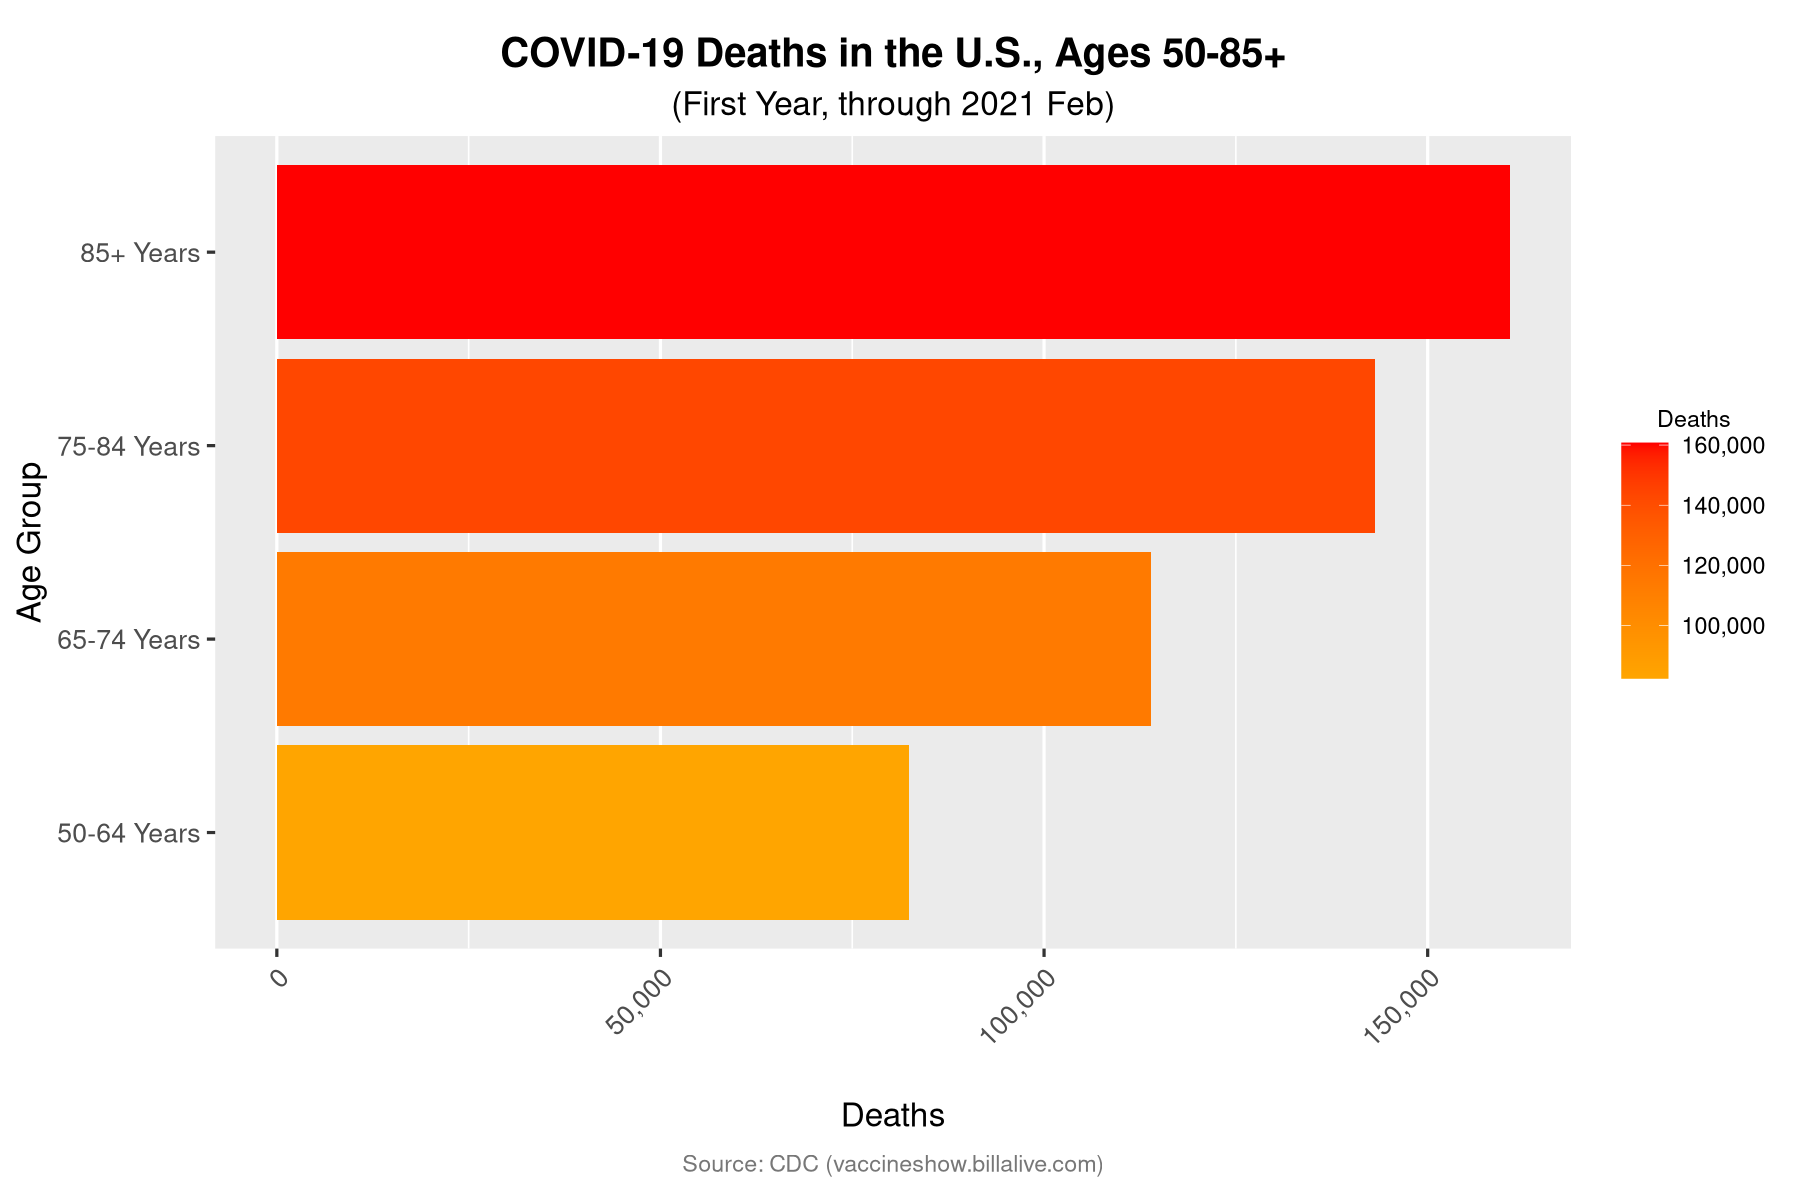

In [12]:
deaths_by_age %>%
filter(str_detect(Ages, "^(50|65|75|85)" )) %>%
ggplot(aes(x=Ages, y=Deaths, fill=Deaths)) +
  labs(
    title = "COVID-19 Deaths in the U.S., Ages 50-85+",
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Age Group",
    y="Deaths"
  ) +
bar_format(gradient_low="orange")

### Imagine You Just Turned 50...

Meanwhile, suppose our newly anxious 50-year-old casts a backward glance at the *previous* cohorts. 

If we focus only on ages 30 to 64, turning 50 looks positively lethal.

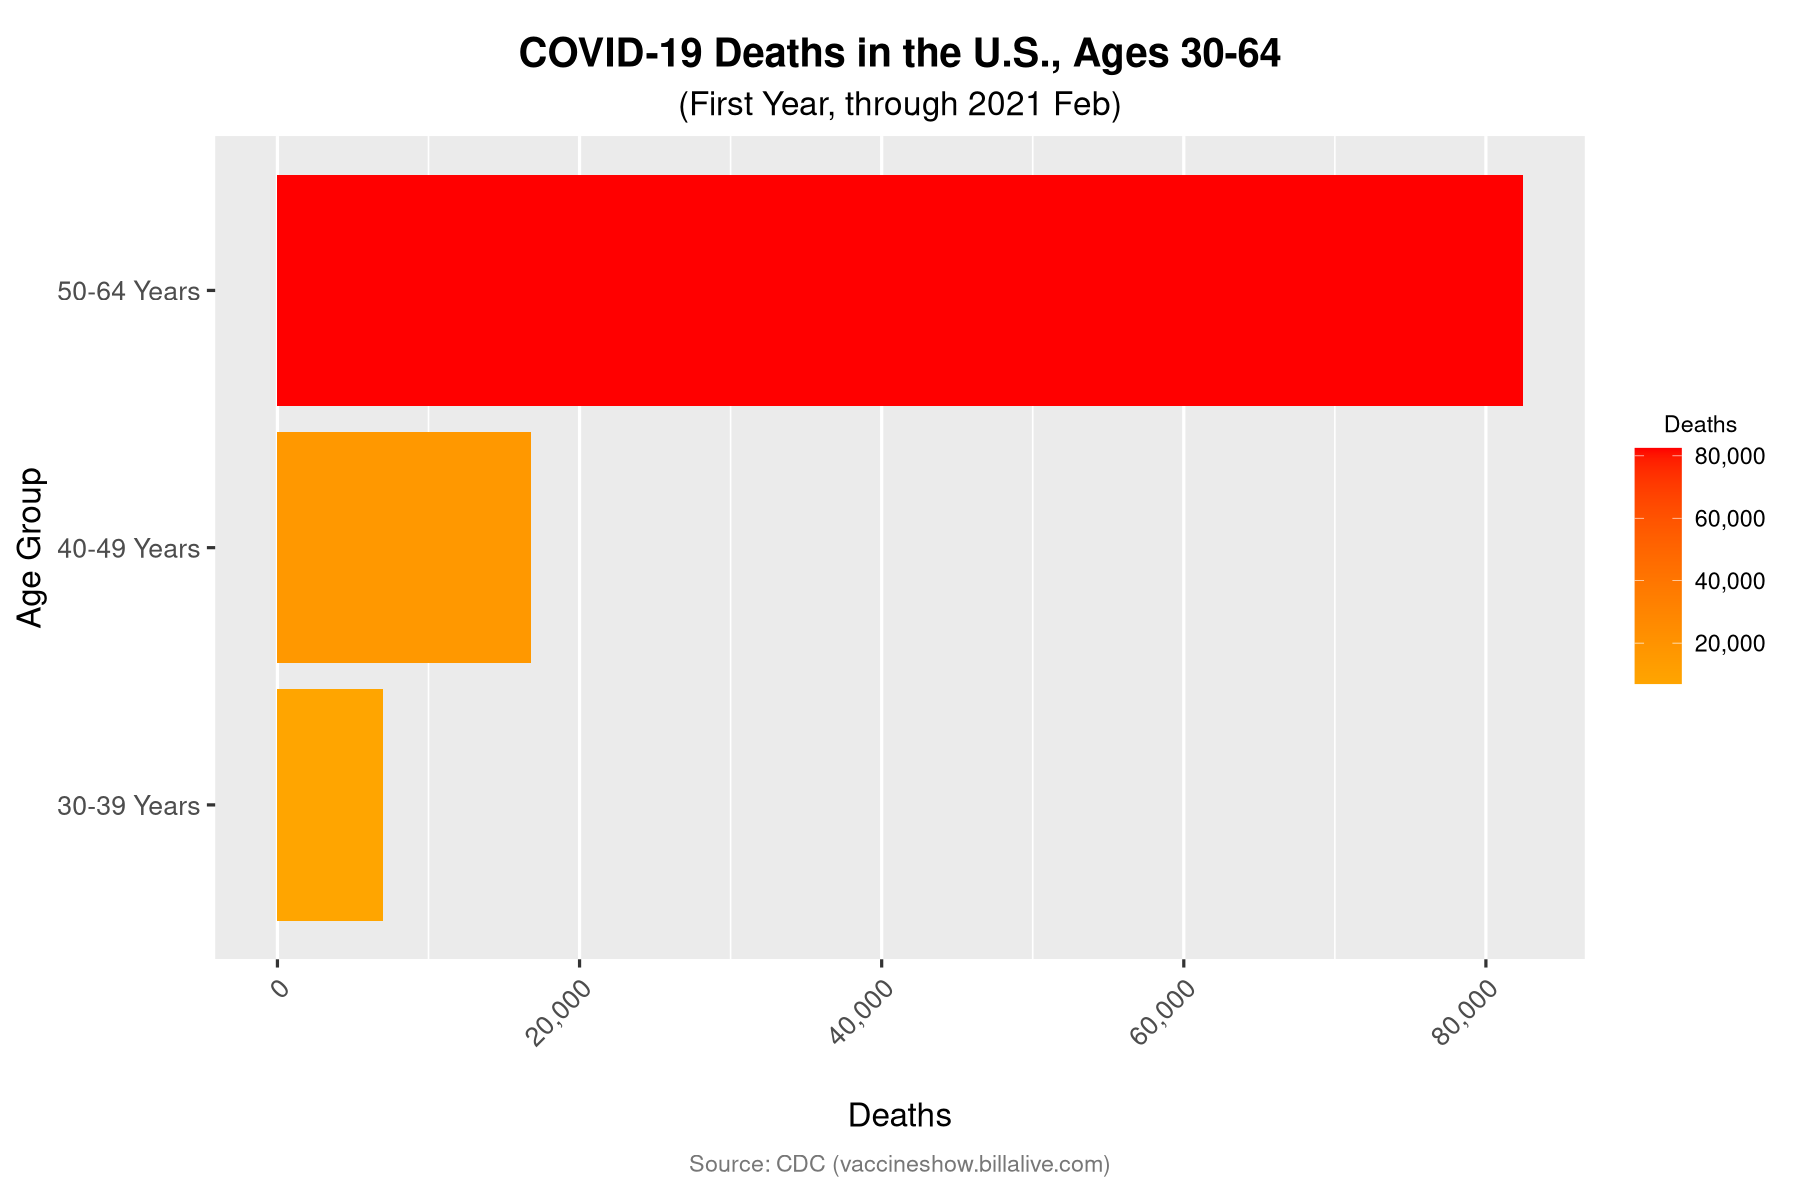

In [13]:
deaths_by_age %>%
filter(str_detect(Ages, "^(30|40|50)" )) %>%
ggplot(aes(x=Ages, y=Deaths, fill=Deaths)) +
  labs(
    title = "COVID-19 Deaths in the U.S., Ages 30-64",
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Age Group",
    y="Deaths"
  ) +
bar_format(gradient_low="orange")

Imagine if *this* were the chart we'd been seeing this whole time.

Or take it further. Imagine an alternate universe where people over  65 were suddenly *safe* from COVID-19. Even if the numerical death counts in all other age groups had stayed exactly the same, wouldn't they have *seemed* so much more significant? 

Of course, fortysomethings shouldn't congratulate themselves too much. We can change the frame again.

### ... Or You Just Turned 40...

Turning 40 is never easy. But if we now imagine a pandemic that had spared everyone over *50*... it's even worse.

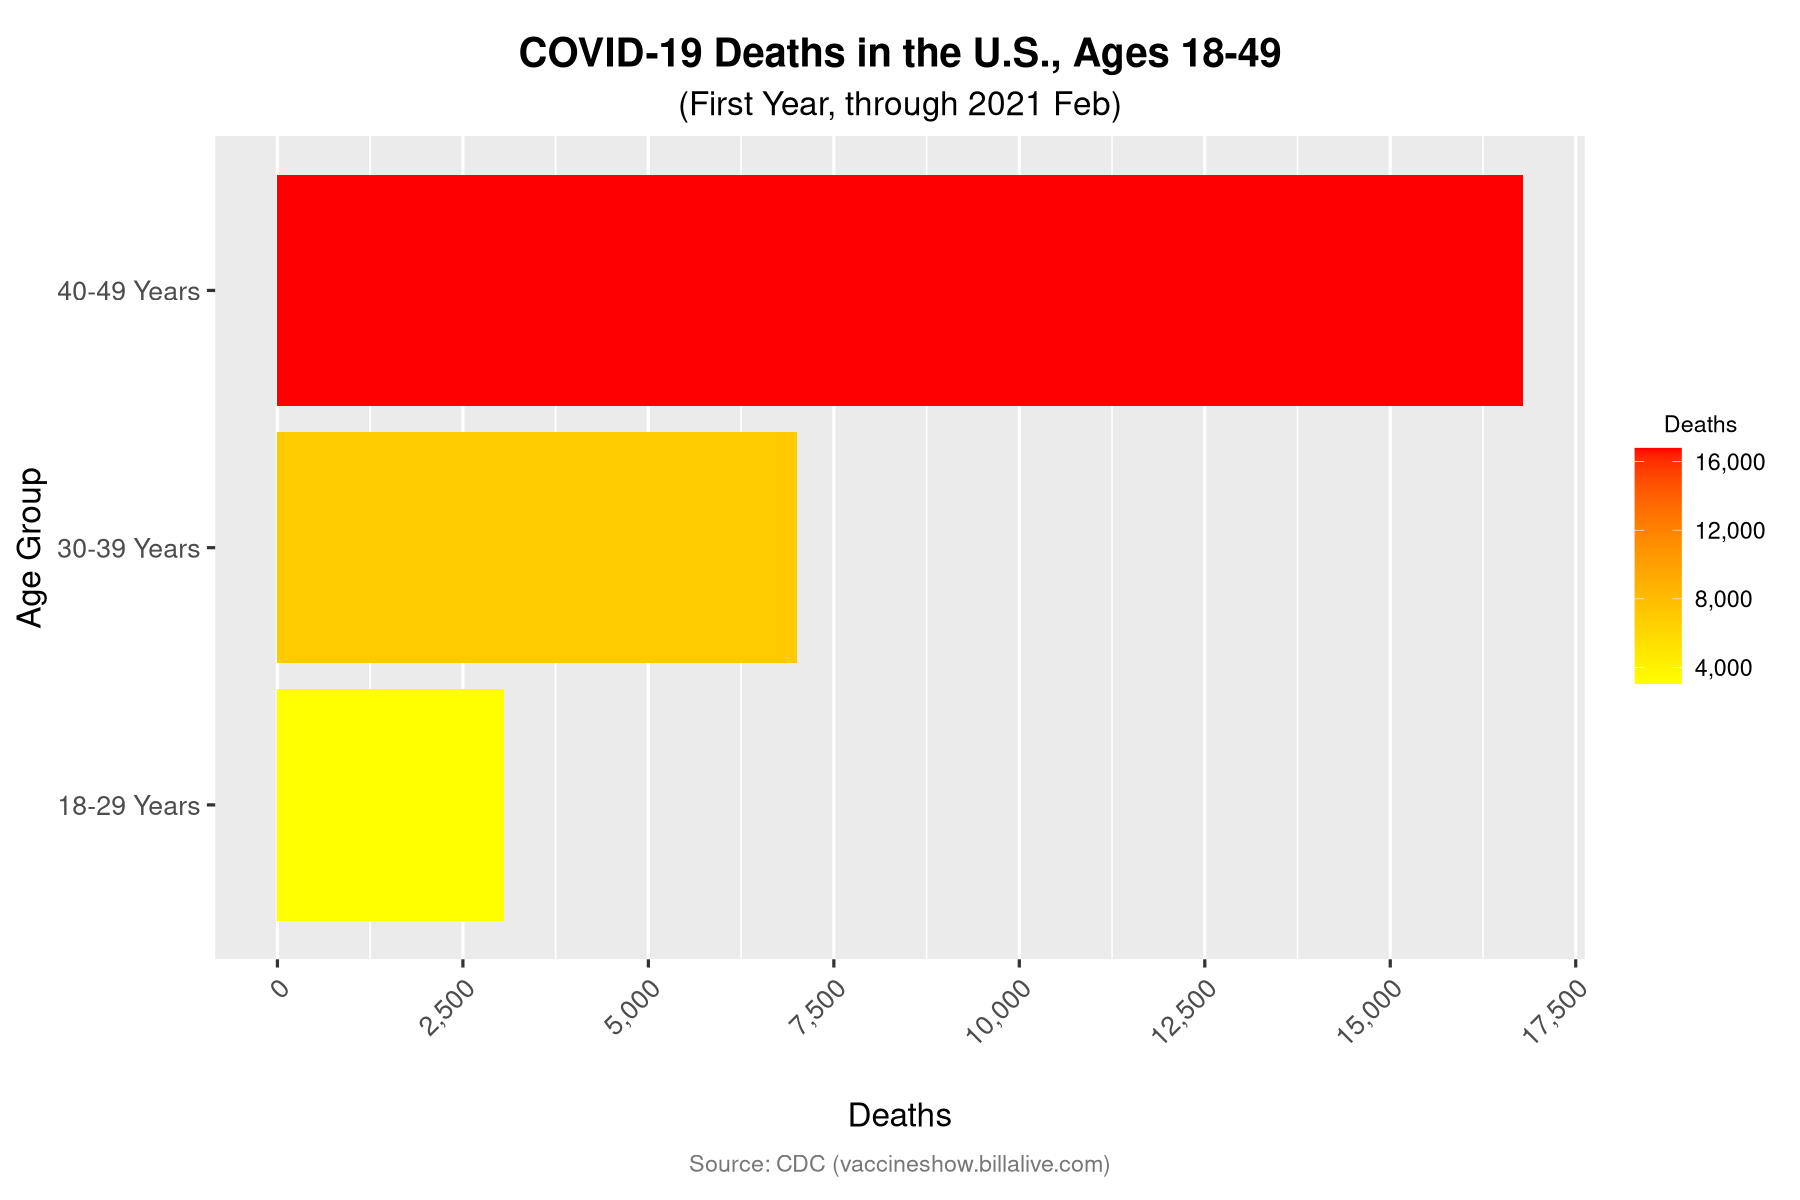

In [14]:
deaths_by_age %>%
filter(str_detect(Ages, "^(18|30|40)" )) %>%
ggplot(aes(x=Ages, y=Deaths, fill=Deaths)) + 
  labs(
    title = "COVID-19 Deaths in the U.S., Ages 18-49",
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Age Group",
    y="Deaths"
  ) +
 bar_format(scale_y_continuous=FALSE) +
scale_y_continuous(label=comma, breaks=seq(0,20000,by=2500))

### ... Or You Just Turned 30...

Change the frame once more, and turning 30 seems just as bad.

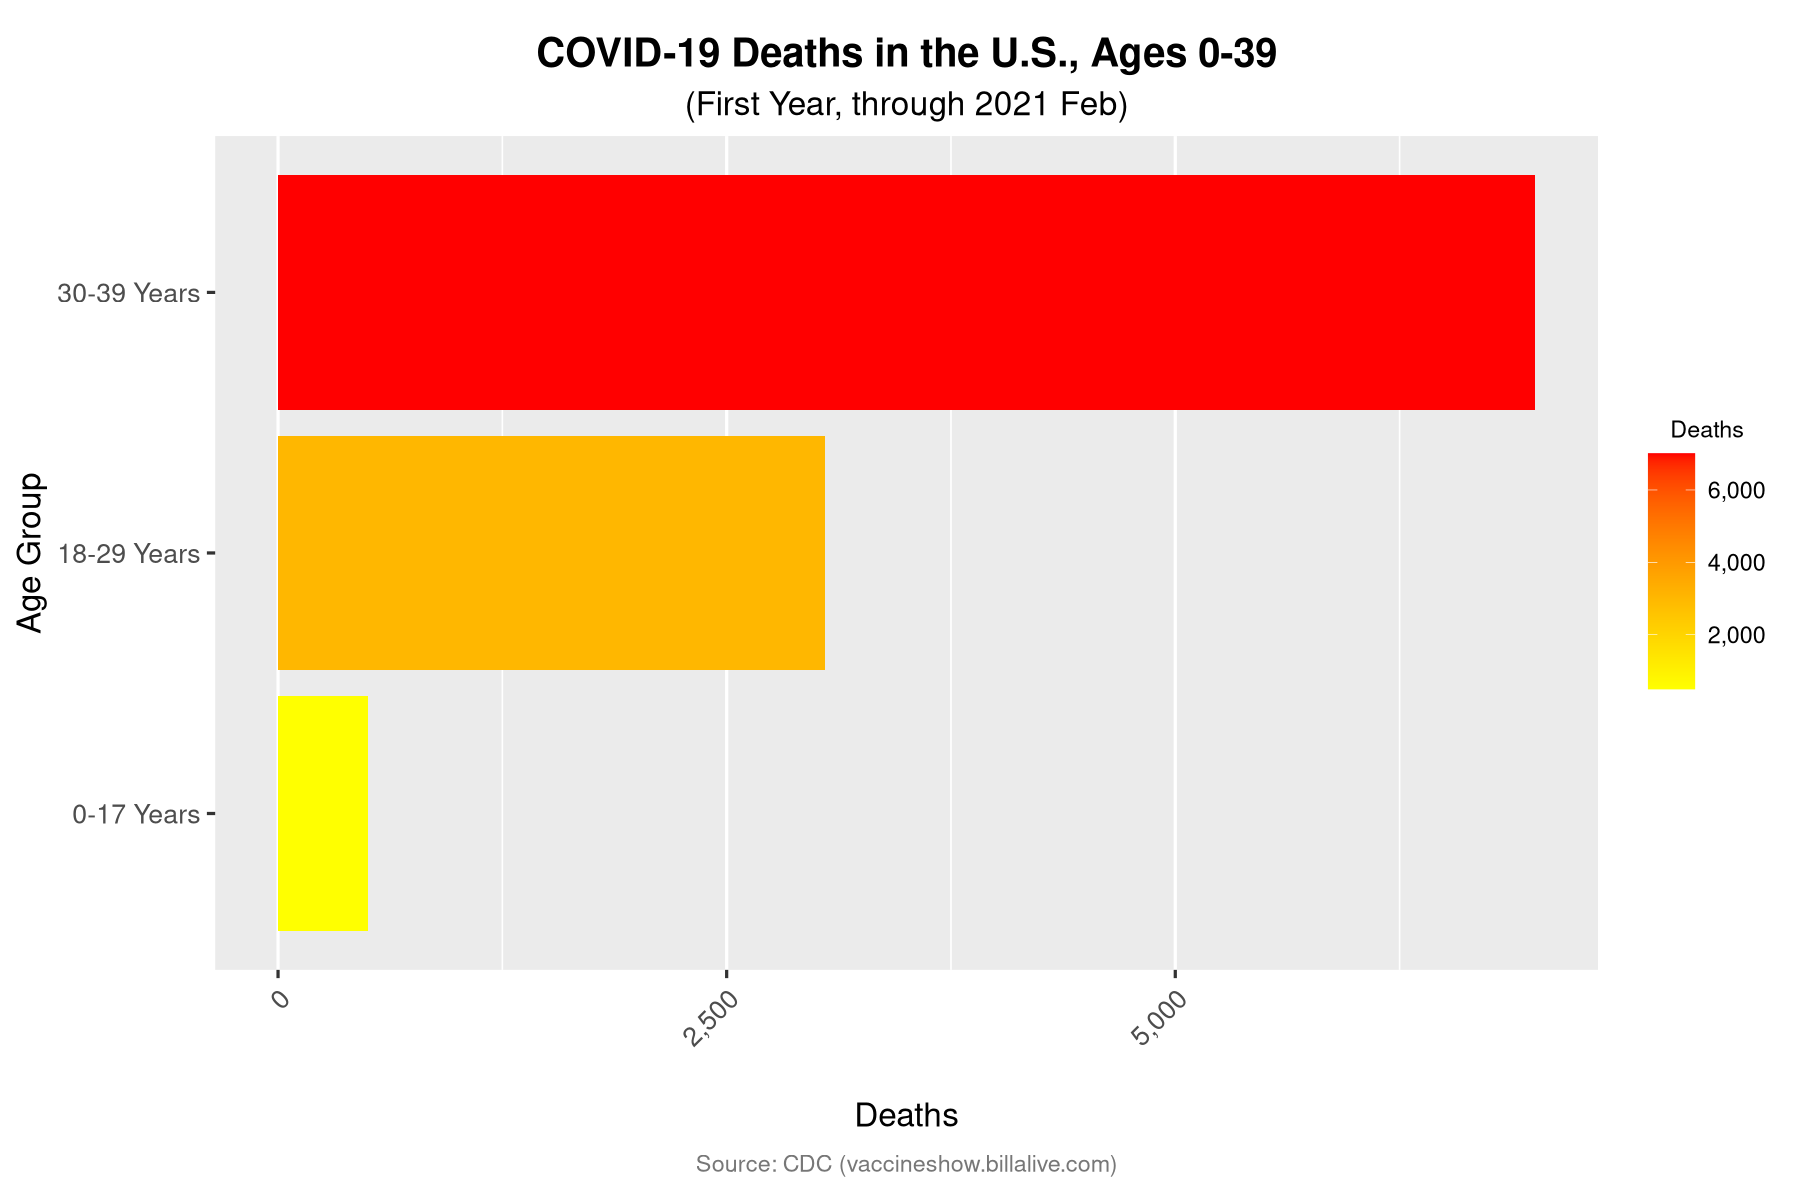

In [15]:
deaths_by_age %>%
  # Extract the first number from Ages so you can do a numeric sort.
mutate(Ages_Sort = str_extract(Ages, "^[0-9]+")) %>%
filter(str_detect(Ages, "^(0|5-|12|18|30)" )) %>%
ggplot(aes(x=reorder(Ages, sort(as.numeric(Ages_Sort))), y=Deaths, fill=Deaths)) + 
  labs(
    title = "COVID-19 Deaths in the U.S., Ages 0-39",
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Age Group",
    y="Deaths"
  ) +
    bar_format(scale_y_continuous=FALSE) +
    scale_y_continuous(label=comma, breaks=seq(0,20000,by=2500))

### ... Or You Just Turned 18.

But even 30 has nothing on turning 18. What a jump...

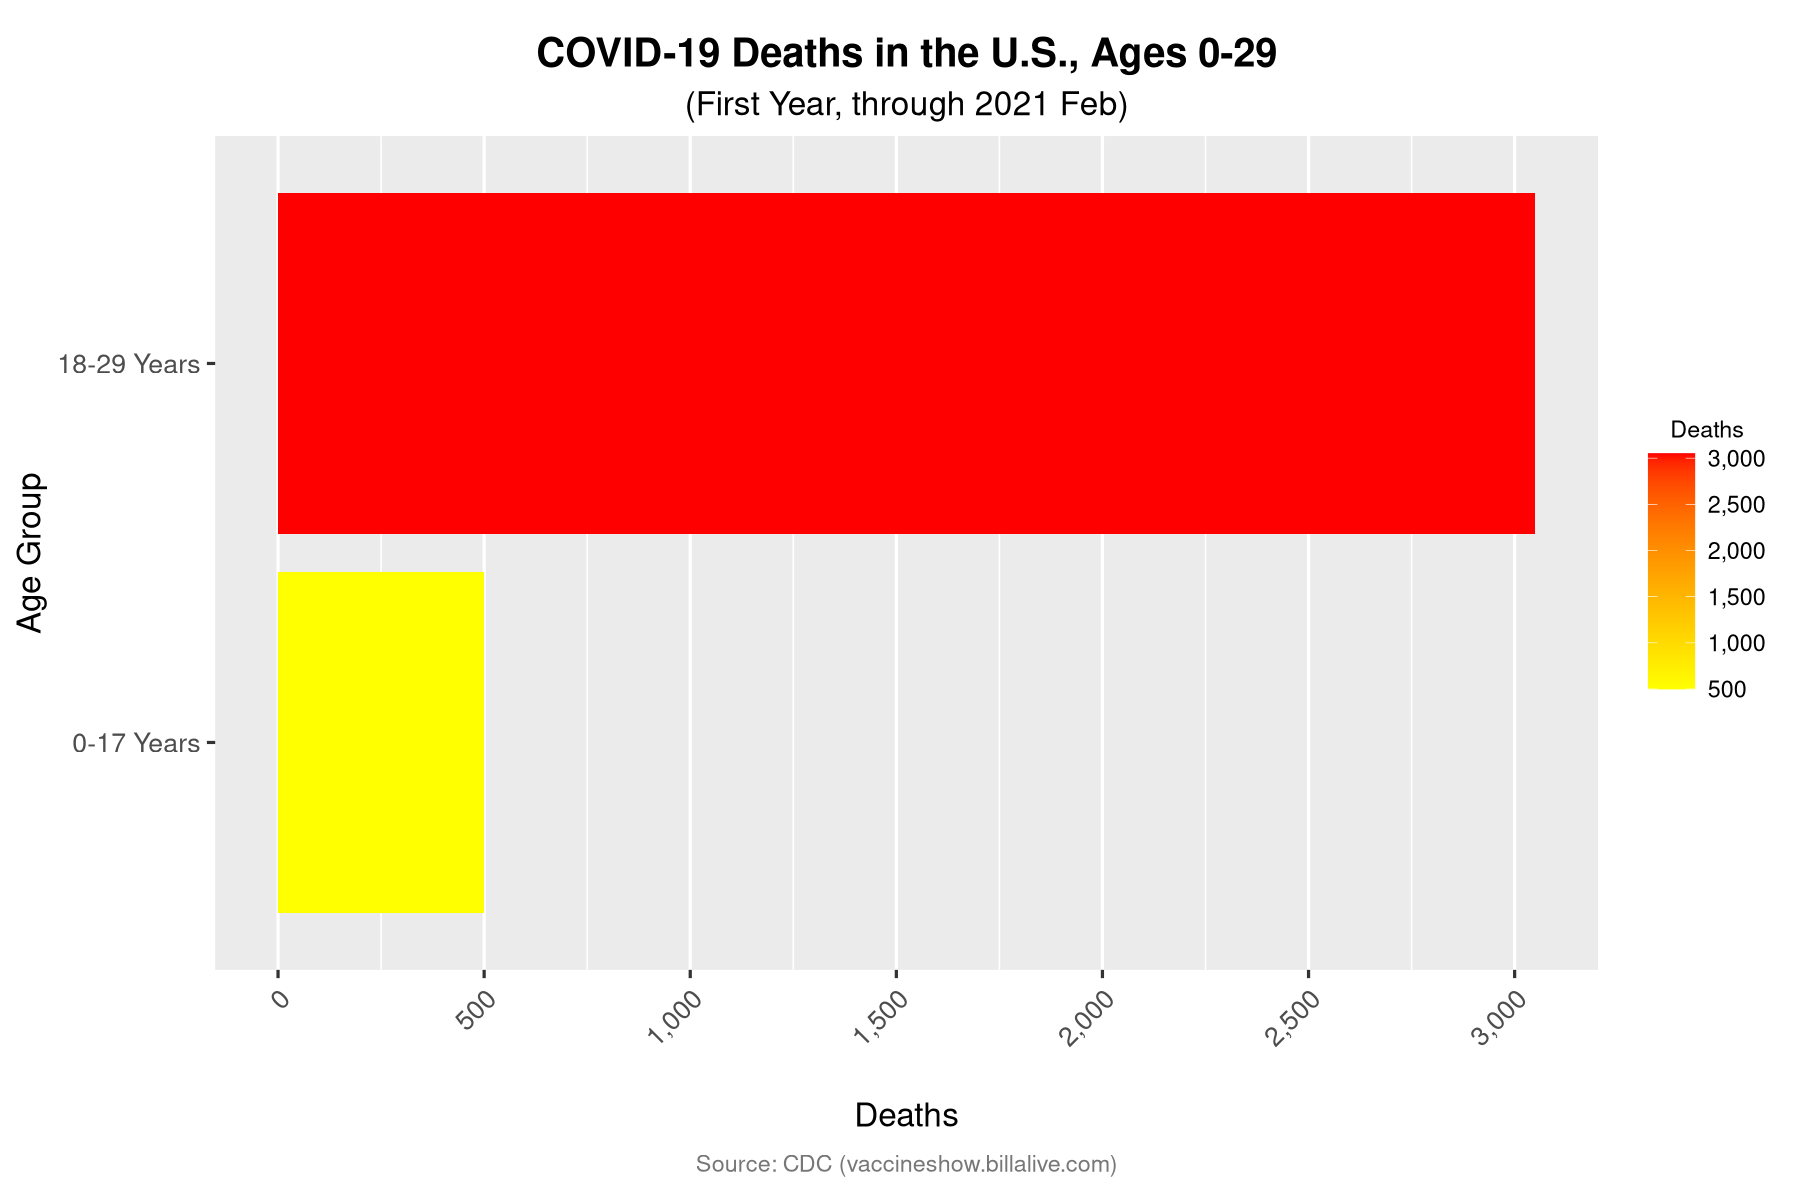

In [16]:
deaths_by_age %>%
  # Extract the first number from Ages so you can do a numeric sort.
mutate(Ages_Sort = str_extract(Ages, "^[0-9]+")) %>%
filter(str_detect(Ages, "^(0|5-|12|18)" )) %>%
ggplot(aes(x=reorder(Ages, sort(as.numeric(Ages_Sort))), y=Deaths, fill=Deaths)) + 
  labs(
    title = "COVID-19 Deaths in the U.S., Ages 0-29",
    subtitle = subtitle,
    caption = caption_default("CDC"),
    x="Age Group",
    y="Deaths"
  ) +
    bar_format(scale_y_continuous=FALSE) +
    scale_y_continuous(label=comma, breaks=seq(0,20000,by=500))

Of course, your actual risk doesn't automatically zoom to your cohort maximum on your birthday. The point is that every new frame radically changes our sense of contrast, our sense of the relative risk depending on one's age.

### But What Do These Numbers *Mean*?

Have you noticed a problem with all these comparisons? 

The scale is always set by the *highest number*, the big red bar at the top.

It takes an effort to check the X axis and estimate the actual numbers involved. 

Let's look again at the deaths for all ages, but this time with the numbers easier to read.

In [35]:
title = "COVID-19 Deaths in the U.S., All Ages"
subtitle = show_date_updated()
show_table(prep_table(deaths_by_age %>% arrange(c(desc(Deaths))), title, subtitle=subtitle, col_number="Deaths") %>%
    tab_source_note(
        source_note = md("Source: CDC, [COVID Data Tracker](https://covid.cdc.gov/covid-data-tracker/#demographics)")
    ) %>%
    gt_plt_bar(column = Deaths, keep_column = TRUE, color = color_bar))

Shiny tags cannot be represented in plain text (need html)

Does this help?

If you have an instant reference point for numbers like "82,424" or "16,783", perhaps these numbers are more meaningful than simple bars. If not, it's hard not to slide back into comparing all the bars to the biggest.

## COVID Has Killed More Americans Ages 50-64 Than Live in These Cities

You might have seen comparisons of the *total* COVID-19 death toll to the populations of various cities.

I find this helpful... but not if my mind instantly adds, "and most of those were the elderly".

What if we make this comparison only to the death toll for a particular age group?

In [18]:
data <- read_csv("data/covid-deaths-vs-cities-50-64-first-year.csv", show_col_types = FALSE)
title = "In its first year, COVID-19 Killed More Americans Aged 50 to 64 Than the Populations of These Cities"
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. City Populations from 2020")

show_table(prep_table(data %>% arrange(c(desc(Population))), 
                      title, subtitle=subtitle, col_number="Population") %>%
    gt_highlight_rows(rows = 1, fill = color_covid_row) %>%
    gt_plt_bar(
        column = Population,
        keep_column = TRUE,
        color = ifelse(str_detect(gt_index(., City), covid_match_str), 
                       color_bar, "gray")
    ))

Shiny tags cannot be represented in plain text (need html)

Again, this is **only** deaths for Americans between 50 and 64. And only for the first 12 months of the pandemic.

Does this still seem like a disease that's only killing "old people"?

What about the current status? As of **2022 September**, the updated death toll for ages 50 to 64, out of `903,826` COVID-19 deaths with demographic information, is now `162,045`. 

In [31]:
covid_deaths_with_demographic_info = "903,826"
data <- read_csv("data/covid-deaths-vs-cities-50-64-current.csv", show_col_types = FALSE)
title = "By Now, COVID-19 Has Killed More Americans Aged 50 to 64 Than the Populations of These Cities"
subtitle = paste("COVID-19 Deaths (out of ", covid_deaths_with_demographic_info , ") vs. City Populations from 2020")

show_table(prep_table(data %>% arrange(c(desc(Population))), 
                      title, subtitle=subtitle, col_number="Population") %>%
    gt_highlight_rows(rows = 1, fill = color_covid_row) %>%
    gt_plt_bar(
        column = Population,
        keep_column = TRUE,
        color = ifelse(str_detect(gt_index(., City), covid_match_str), 
                        color_bar, "gray")
    ))

Shiny tags cannot be represented in plain text (need html)

:::{note}
Why is the total number of COVID-19 deaths in this chart's subtitle about 100,000 less than the most-up-to-date total of over 1 million? Because there is a lag time before full demographic data is available. So in reality, the total number of COVID-19 deaths in this age group may be 200,000 or more. 
:::

#### Sources

* CDC, [Demographic Trends of COVID-19 cases and deaths in the US reported to CDC](https://covid.cdc.gov/covid-data-tracker/#demographics) (Most recently accessed: 2022-09-20.)
* Wikipedia, [List of United States Cities by Population](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population)

## COVID-19 (First Year) vs. Other Leading Causes of Death (2019)

Although comparing the death toll to an entire city population is a stark image, it doesn't really help us make sense of the relative *risk*. 

Let's compare the first year of COVID-19 deaths to the leading causes of death in the previous year, 2019.

The CDC did try to publicize that, overall, COVID-19 was the **third** leading cause of death in 2020.

```{figure} assets/cdc-covid-third-leading-cause-2020.jpg
---
width: 700px
align: center
name: covid-third-leading-cause-death-2020
---
CDC, [Provisional Mortality Data — United States, 2020](https://www.cdc.gov/mmwr/volumes/70/wr/mm7014e1.htm)
```

But without more data, we might be inclined to assume that this was still  weighted heavily by the extremely high death tolls among the most elderly.

Let's compare COVID-19 deaths to other leading causes **by age bracket**.

### Why Use 2019 Death Data instead of 2020 or 2021 Death Data?

We all entered the pandemic with a mental map of what "normal" risks were. The pandemic had side effects on some of these risks (such as accidents and suicides), so I want to see how our last "normal" year compared to the first 12 months of COVID-19.

:::{seealso}
You can research causes of death further with the [CDC Wonder](https://wonder.cdc.gov/) database. 

Note that, as of **2022 September**, there is still no data available yet for 2021. For COVID-19 deaths, I have relied on the [CDC Covid Data Tracker](https://covid.cdc.gov/covid-data-tracker/#demographics), which is much more up-to-date.
:::

### Ages 1-19

The one real mercy of the pandemic: compared to other age brackets, the death rate for children and teenagers has been comparatively low. 

Everyone seems to "know" this already, but when we compare it to other leading causes of death for these ages, it does turn out to be true. 

Yes, COVID-19 still ranked in a grim seventh place, but the other causes of death were far more likely.

Not that those other causes are consoling. I had no idea the numbers for suicide and murder were this high.

:::{note}
This comparison is not perfect, because the age brackets for the leading causes of death (1-19) do not match up perfectly with the age brackets for COVID-19 deaths (0-17). When full demographic data for 2021 is available, I can update this chart.

I also excluded [babies younger than 1](https://wonder.cdc.gov/controller/saved/D158/D306F697) from this chart, because they have unique early causes of death that would don't apply to older children. `Certain conditions originating in the perinatal period` killed `10,294` babies in 2019, and this would dominate the chart in the top rank.
:::

In [29]:
data <- read_csv("data/covid-deaths-vs-other-age-01-19.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("1-19")
subtitle = paste("COVID-19 Deaths for Ages 0-17", show_date_updated(), "vs. Other Causes of Death for ages 1-19 (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Ages 20-29

As we cross into the 20s, COVID-19 has already jumped into **fourth place**. 

True, COVID-19 deaths are still dwarfed by the top cause, accidents, and  well below suicides and murders. 

Still, for people in their **twenties** during the unvaccinated first year of the pandemic, COVID-19 was **more deadly than any other disease**.

In [22]:
data <- read_csv("data/covid-deaths-vs-other-age-20-29.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("20-29")
subtitle = paste("COVID-19 Deaths for Ages 18-29", 
                 show_date_updated(), 
                 "vs. Other Causes of Death for ages 18-29 (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

:::{note}
This comparison is not perfect, because the age brackets for the leading causes of death (20-29) do not match up perfectly with the age brackets for COVID-19 deaths (18-29). But even if we excluded the 18- and 19-year-olds, this would have to remove at least a third of the total deaths (about 900) in order to change the ranking. Which seems unlikely.
:::

### Ages 30-39

The good news as we enter our 30s: murder is no longer in the top three ways to die.

The bad news: COVID-19 is, at **third place**, quite close to suicide.

In [23]:
data <- read_csv("data/covid-deaths-vs-other-age-30-39.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("30-39")
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. Other Causes of Death (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Ages 40-49

About as many people in their 40s committed suicide as in their 30s, but now many more people died of cancer, heart disease... and COVID-19, at **fourth place**.

In [24]:
data <- read_csv("data/covid-deaths-vs-other-age-40-49.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("40-49")
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. Other Causes of Death (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Ages 50-64

From here on out, COVID-19 will be keeping pace with cancer and heart disease as all three mushroom in victim count. 

In [25]:
data <- read_csv("data/covid-deaths-vs-other-age-50-64.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("50-64")
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. Other Causes of Death (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Ages 65-74

In [26]:
data <- read_csv("data/covid-deaths-vs-other-age-65-74.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("65-74")
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. Other Causes of Death (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Ages 75-84

In [27]:
data <- read_csv("data/covid-deaths-vs-other-age-75-84.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("75-84")
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. Other Causes of Death (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Ages 85+

In [28]:
data <- read_csv("data/covid-deaths-vs-other-age-85-plus.csv", show_col_types = FALSE)
title = title_ages_vs_leading_cause("85+")
subtitle = paste("COVID-19 Deaths", show_date_updated(), "vs. Other Causes of Death (in 2019)")
show_table_covid_vs_other(data, "Cause")

Shiny tags cannot be represented in plain text (need html)

### Sources

- [COVID-19 U.S. Deaths by Age Group (CDC)](https://covid.cdc.gov/covid-data-tracker/#demographics)

- Leading Causes of U.S. Death in 2019 (CDC WONDER): 
[Ages 1-19](https://wonder.cdc.gov/controller/saved/D158/D306F695),
[Ages 20-29](https://wonder.cdc.gov/controller/saved/D158/D306F697),
[Ages 30-39](https://wonder.cdc.gov/controller/saved/D158/D217F416),
[Ages 40-49](https://wonder.cdc.gov/controller/saved/D158/D222F216),
[Ages 50-64](https://wonder.cdc.gov/controller/saved/D158/D222F925),
[Ages 65-74](https://wonder.cdc.gov/controller/saved/D158/D306F702),
[Ages 75-84](https://wonder.cdc.gov/controller/saved/D158/D306F704),
[Ages 85+](https://wonder.cdc.gov/controller/saved/D158/D306F707)

## Summary

Is COVID-19 "mostly" a disease for "old people"?

:::{margin}
Except for those 85 and over, for whom COVID-19 was the *second* leading cause of death.
:::

No. In the first year of the pandemic, **COVID-19 was the third or fourth leading cause of death** for **adults of all ages**.

True, the sheer *number* of deaths grew rapidly with age. 

But imagine if any single age bracket had been the only target of the disease. What if *only* people in their thirties, or *only* people in their fifties, had suddenly faced a new disease that, within *one year*, was the third leading cause of death for their age? How would we have viewed these death tolls?

:::{important}
We don't see cancer or heart disease as afflicting "mostly" the old, much less diabetes, murder, or suicide. Why should COVID-19 be different?

For **unvaccinated adults at any age**, the risks of COVID-19 should be understood in the context of any other leading cause of death for their age group. 
:::

I hope this report has suggested a fresh view of the COVID-19 data. 

When mortality data is available for 2021, I plan to write an updated report that explores how the vaccines have drastically lowered the risks for those who take them, and whether the risk of death has changed for those who don't.

:::{seealso}

For a more in-depth exploration that engages more fully with hesitations about the vaccine (and whether this data can be trusted at all), see [*The Vaccine Show!*]

```{image} assets/Vaccine_Show_Logo.png
:width: 400px
:alt: Vaccine Show Logo
:align: center
```
:::

(caveats)=
## Appendix: Important Caveats

This report is, alas, far from perfect. Several reasons spring to mind.

(focus-united-states)=
### Focus on the United States

As an American writing for Americans, I have focused entirely on data from the United States. 

My point here is to consider COVID-19 in the context of our specific cultural expectations about risk, safety, and life expectancy here in the U.S. If I had brought in data from the rest of the world, with its wildly differing approaches to COVID-19 countermeasures and health care systems, these comparisons would have been hopelessly muddled.

(first-year-covid)=
### Why Focus on the "First Year" Of COVID-19?

COVID-19 has not been like other causes of death. Unlike car accidents or cancer, COVID-19 is *contagious*. So how can we compare this death toll to ordinary causes of death that don't have the potential for exponential growth?

#### How Many Months of COVID Deaths Should We Compare to a Year of Ordinary Mortality Data?

When I first gathered this data in 2021 September, the CDC graph of [cumulative deaths from COVID-19](https://covid.cdc.gov/covid-data-tracker/#trends_totaldeaths) showed a trend line that was very much *not* straight:

:::{figure} assets/cdc-usa-covid-cumulative-deaths-2021-09.png
---
width: 700px
---
Source: CDC, [Trends in Number of COVID-19 Cases and Deaths in the US Reported to CDC, by State/Territory](https://covid.cdc.gov/covid-data-tracker/#trends_totaldeaths), 2021 September
:::

As I wrote then, in *The Vaccine Show*:

> You can see it spike at first in April 2020, slow down as we started masks and lockdowns, pick up speed in August, devastate over the winter, finally taper off in spring of 2021 as we got the vaccines… and then spike again in late summmer, as Delta hit.

> As of September 2021, it's too early to tell how this Delta phase will go. 

Yes, it was. Not long after, we'd hear about Omicron.

As of now, **2022 September**, here is that chart, updated.

:::{figure} assets/cdc-usa-covid-cumulative-deaths-2022-09.png
---
width: 700px
---
Source: CDC, [Trends in Number of COVID-19 Cases and Deaths in the US Reported to CDC, by State/Territory](https://covid.cdc.gov/covid-data-tracker/#trends_totaldeaths), 2022 September
:::

The trend line hasn't gotten any more predictable.

Meanwhile, ordinary mortality data is broken up by **year**. Is it really fair to compare a year of a pandemic, the *first* year of a contagious disease, to an ordinary year of deaths?

Despite the obvious potential problems, I decided to go ahead and stick to those first twelve months. My audience here is not statisticians, but ordinary people trying to make sense of an ocean of data. It seems most "fair" to compare twelve months of COVID to twelve months of everything else. 

#### The First Year Of COVID-19 Had No Vaccines

Another reason to focus only on the first twelve months of COVID-19 deaths: February just happened to be around the time when the vaccines were rolled out in the United States. 

As the above chart shows, the death rate clearly slowed as the vaccines were introduced. But how much of this was due directly to vaccines? It would be months before the data would be available on what percentage of the continuing deaths were among the vaccinated vs. the unvaccinated. By limiting my comparisons to the first twelve months of the pandemic, I could avoid that question, which, in 2021 September, could not yet be answered. 

#### To Which Year Should We Compare Causes of Death?

Even though I decided to compare twelve months of COVID deaths to twelve months of other causes of death, another question was, *which* twelve months? 2020 was no ordinary year. The pandemic had a direct impact on other causes of death. Car accidents were down, but suicides were up.

I decided to compare ordinary causes of death from the *previous* year, **2019**. This isn't perfect, but it's the closest we can get to a fair comparison to the old "normal".

### What About Long COVID?

This report focuses entirely on the risk of **death** from COVID-19.

But for most of these pandemic, we've known that for most of us, the far more likely outcome is "long COVID", a nebulous purgatory that, even now, seems disgracefully understudied.

A true risk comparison between the risk of the vaccines vs. the risk of COVID-19 would be heavily weighted by your chances suffering long COVID symptoms, possibly for the rest of your life. 

But I have not been able to find data on long COVID that seems truly authoritative. Every significant new study gives a different set of numbers. 

For now, the best I can do is flag this issue. The odds of dying are already stark enough, but long COVID is far more likely.

### What About the Risks *From* the Vaccines?

With all these risks compared, one risk is glaringly absent in this report: the risk from the *vaccines themselves*.

When I originally worked on *The Vaccine Show!* in mid-2021, I was not aware of a single death that could be reliably attributed to the new vaccines. 

As of **2022 September**, the CDC has an entire [page devoted to "adverse events"](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/safety/adverse-events.html) associated with the COVID-19 vaccines. But these events are *exceedingly* rare, on the order of literally 1 in a million. (The highest rate I can find is 106 cases of myocarditis in 16-17 year old males... per *one million* doses.) 

These events are not only incredibly unlikely, but *not fatal*. They could be meaningfully compared with long COVID, but as we've seen, that data is not yet available.

For our purposes, the relevant question is: have there been any *actual deaths* that can be causally linked to the COVID-19 vaccines? 

The answer: Yes. 

Nine.

Or... up to 16,000+?

Apparently, it's complicated. Here's the CDC:

> **Reports of death after COVID-19 vaccination are rare.** FDA requires healthcare providers to report any death after COVID-19 vaccination to VAERS, even if it’s unclear whether the vaccine was the cause. **Reports of adverse events to VAERS following vaccination, including deaths, do not necessarily mean that a vaccine caused a health problem.** More than 610 million doses of COVID-19 vaccines were administered in the United States from December 14, 2020, through September 7, 2022. During this time, VAERS received **16,336 preliminary reports of death (0.0027%)** (emphasis added) among people who received a COVID-19 vaccine. CDC and FDA clinicians review reports of death to VAERS including death certificates, autopsy, and medical records.

> Continued monitoring has identified **nine deaths** (emphasis added) causally associated with J&J/Janssen COVID-19 vaccination. CDC and FDA continue to review reports of death following COVID-19 vaccination and update information as it becomes available.

Honestly, I wish this language were more clear. Does this mean that out of all those reports, only *nine* are confirmed? 

What percentage of the 16,000+ *reported* deaths should we take to be actually due to a vaccine shot? Is this probably more like 8,000? Or 80? 

And where is the demographic data on these deaths? Do they follow the same age distribution as COVID-19 deaths?

:::{important}
Remember: unlike a coroner's report, *anyone* can [submit a VAERS report](https://vaers.hhs.gov/reportevent.html).
:::

#### Maximum Conceivable Deaths from Vaccine vs. Confirmed Deaths From COVID-19

But let's take the worst-case scenario. Suppose that every single one of those deaths were directly caused by the vaccine. Here's what that looks like next to the COVID death toll:

In [33]:
library(tibble)
vaccine_deaths <- 16336

gt_table <- enframe(c(
    "Maximum Conceivable Deaths From COVID-19 Vaccines" = vaccine_deaths, 
    "Confirmed Deaths From COVID-19" = covid_deaths_updated_num),
    name = "Cause",
    value = "Deaths") %>%
gt() %>%
gt_theme_538() %>%
tab_header(
    title = "VAERS Reported Deaths Possibly Related to COVID-19 Vaccines vs. COVID-19 Deaths in the U.S.",
    subtitle = show_date_updated(use_date_updated=TRUE)
    ) %>%
tab_source_note(
    source_note = md("Source: CDC, [Selected Adverse Events Reported after COVID-19 Vaccination](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/safety/adverse-events.html)")
    ) %>%
gt_plt_bar(
    column = Deaths,
    keep_column = TRUE,
    color = 'red'
) %>%
fmt_number(
    columns = Deaths,
    decimals = 0
    )

gt:::as.tags.gt_tbl(gt_table)


Shiny tags cannot be represented in plain text (need html)

Even if every preliminary VAERS-reported death were actually directly due to the vaccine, **COVID would still be more than 64 times more likely to kill you.**

Since we cannot escape facing the risk of COVID-19, the choice to risk the vaccine would still be extremely rational.

But this comparison is probably spurious. 

These are *preliminary reports*, not confirmed deaths due to the vaccine. Actual deaths due to the vaccine could easily be orders of magnitude lower.

In a future update to this report, if I can get reliable demographic data for deaths that are confirmed as due to the COVID-19 vaccines, I will include them in the charts comparing COVID-19 to other leading causes of death. 

(vaccines-change-odds)=
### Haven't Vaccines Drastically Changed These Odds?

The final objection to these charts may also the most obvious: don't we have vaccines now? What is the relevance of a series of charts that focus on COVID-19 risks *before* we had widespread vaccination?

Because the death toll continues.

Yes, this notebook focuses on COVID-19 deaths for the **first year** of the pandemic. The official COVID-19 death toll in the United States, per the CDC, was `527,587` Americans dead through **2021 February**.

Back then, we could still remember a time when that number was supposed to be unthinkable, when the most pessimistic estimates were on the order of, say, 200,000.

But in the intervening year and a half, almost **another 500,000 Americans have died**.

As I write this now, in mid-September 2022, the [CDC](https://www.cdc.gov/nchs/covid19/mortality-overview.htm) gives a death toll of `1,048,935`.

```{image} assets/cdc-covid-deaths-to-2022-09-10.png
:width: 500px
:alt: CDC - COVID Deaths through 2022-09-10
:align: center
```

In the news, that million-death milestone has already come and gone. It's still obscene.

So yes, *for those who are vaccinated*, these charts are now mercifully out of date.

But for the *unvaccinated*, it is not all obvious that the relative risk of dying from COVID-19 is less than it was a year ago. 

On the positive side:

* As our immunity grows, both from vaccinations and nonfatal cases of COVID-19, that means less virus circulating to infect the unvaccinated.

* We now have much improved treatments to reduce the risk of death.

But on the negative side:

* Newer variants are far more contagious than the original strain.

* The unvaccinated often move in social circles with other friends and family who also refuse vaccines.

If you're still not vaccinated, even if you've had a "mild" case of COVID-19 already, your risk of death may still be higher now than it's ever been. The death toll continues, and the vast majority of deaths are among the unvaccinated.

As new data becomes available, I plan on releasing a new report that makes these same risk comparisons to other causes of death, but adjusted for the unvaccinated vs. the vaccinated.

For now, the [charts above](charts) are still relevant and, if anything, optimistic, for those who want to get a better idea of their risk of dying from COVID-19 if they decline the protection of vaccines.

In [ ]:
print(paste("Last updated:", date_updated))